<a href="https://colab.research.google.com/github/gifale95/RNC/blob/main/tutorials/multivariate_rnc_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Relational Neural Control (RNC) !!!

Human vision is mediated by a complex interconnected network of cortical brain areas that jointly represent visual information. While these areas are increasingly well understood in isolation, their representational relationships remain elusive: what representational content is shared between areas or unique to a specific area? Here we determined representational relationships by developing [Relational Neural Control (RNC)][rnc_website]. RNC generates and explores in silico functional magnetic resonance imaging (fMRI) responses for large amounts of images, finding controlling images that align or disentangle responses across areas, thus isolating their shared and unique representational content. Together, this reveals how visual areas jointly represent the world as an interconnected network.

In this tutorial you will learn how to use **multivariate RNC**, an RNC variant that controls **multivariate** fMRI responses (i.e., population response of all voxels within a ROI), thus exploring representational relationships for visual information encoded in the multi-voxel response patterns.

To thoroughly explore the visual space in search for controlling stimuli, you will apply RNC to *in silico* neural responses for thousands of images, that is, neural responses generated through encoding models ([Naselaris et al., 2011][2011_naselaris]; [Wu et al., 2006][2006_wu]; [Yamins & DiCarlo, 2016][2016_yamins]). Specifically, you will use pre-generated in silico fMRI responses form the [Neural Encoding Dataset (NED)][ned_website]: encoding-model-generated fMRI responses for ~150,000 naturalistic images coming from the [Natural Scenes Dataset][nsd] ([Allen et al., 2022][allen]), the [ImageNet 2012 Challenge][imagenet] ([Russakovsky et al., 2015][russakovsky]), and the [THINGS Database][things] ([Hebart et al., 2019][hebart]).

<font color='red'><b>NOTE:</b></font> **Beyond familiarizing you with RNC, this tutorial and data can also be used for exploratory research and new discovery, while keeping in mind that the correctness of any finding should then be established through validation on _in-vivo_ fMRI responses.**

You can run this tutorial either on [Colab][colab], or on [Jupyter Notebook][jupyter]. If you experience problems with the code please get in touch with Ale (alessandro.gifford@gmail.com).

For more information on RNC, please see our paper _[In silico discovery of representational relationships across visual cortex][paper_doi]_.

If you use code and/or data from this tutorial, please cite:

> * Gifford AT, Jastrzębowska MA, Singer JJD, Cichy RM. 2024. In silico discovery of representational relationships across visual cortex. _bioRxiv_, ???. DOI: [???][paper_doi]
> * Gifford AT, Cichy RM. 2024. The Neural Encoding Dataset. _In preparation_. https://github.com/gifale95/NED

[rnc_website]: https://www.alegifford.com/projects/rnc/
[ned_website]: https://www.alegifford.com/projects/ned/
[2011_naselaris]: https://doi.org/10.1016/j.neuroimage.2010.07.073
[2006_wu]: https://doi.org/10.1146/annurev.neuro.29.051605.113024
[2016_yamins]: https://doi.org/10.1038/nn.4244
[imagenet]: https://www.image-net.org/challenges/LSVRC/2012/index.php
[russakovsky]: https://link.springer.com/article/10.1007/s11263-015-0816-y
[things]: https://things-initiative.org/
[hebart]: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0223792
[nsd]: https://naturalscenesdataset.org/
[allen]: https://www.nature.com/articles/s41593-021-00962-x
[colab]: https://colab.research.google.com/drive/1bEKCzkjNfM-jzxRj-JX2zxB17XBouw23?usp=sharing
[jupyter]: https://github.com/gifale95/RNC/tutorials/multivariate_rnc_tutorial.ipynb
[paper_doi]: !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# 0 | Configuration

Note that in sections `0.1 Install and import the necessary Python libraries` and `0.2 Access the tutorial data` you will have to run different code cells based on whether you are running the tutorial on Colab or on Jupyter Notebook. An `if statement` will take care of this: you only need to select `'colab'` or `'jupyter_notebook'` for the `platform` variable below.

In [ ]:
platform = "colab" # @param ["colab", "jupyter_notebook"] {allow-input: true}

## 0.1 | Install and import the necessary Python libraries

### 0.1.1 | Install libraries, Google Colab

If you are running the tutorial on Google Colab, you just need to install the [NED toolbox][ned_git].

[ned_git]: https://github.com/gifale95/NED

In [ ]:
!pip install -U git+https://github.com/gifale95/NED.git

  Cloning https://github.com/gifale95/NED.git to /tmp/pip-req-build-3hn5na8q
  Running command git clone --filter=blob:none --quiet https://github.com/gifale95/NED.git /tmp/pip-req-build-3hn5na8q
  Resolved https://github.com/gifale95/NED.git to commit b2ed0a9d7a15a2f1e02372596a3c89e8f334237b
  Preparing metadata (setup.py) ... done
  Created wheel for NED: filename=NED-0.0.10-py3-none-any.whl size=46501 sha256=e07ca51ec4bfc8c10d50034a92469f90469fe94025d8af42f26e9b3464571009
  Stored in directory: /tmp/pip-ephem-wheel-cache-zygjuytl/wheels/85/83/46/b8111e13e7857a1263e10d2a531fdedba00dc665a1d660c955
Successfully built NED


### 0.1.2 | Install libraries, Jupyter Notebook

If you are running the tutorial on Jupyter Notebook, you need to install the following libraries on your local machine before running the tutorial: [numpy][numpy], [h5py][h5py], [pillow][pil], [torchvision][torchvision], [tqdm][tqdm], [sklearn][sklearn], [scipy][scipy], [matplotlib][matplotlib], [ned][ned_git], [jupyter][jupyter].

[numpy]: https://numpy.org/
[tqdm]: https://github.com/tqdm/tqdm
[h5py]: https://docs.h5py.org/en/stable/
[pil]: https://pypi.org/project/pillow/
[torchvision]: https://pytorch.org/vision/stable/index.html
[sklearn]: https://scikit-learn.org/stable/#
[scipy]: https://scipy.org/
[matplotlib]: https://matplotlib.org/stable/index.html
[jupyter]: https://jupyter.org/
[ned_git]: https://github.com/gifale95/NED

### 0.1.3 | Import the libraries

Once you have installed all necessary libraries, import them with the following code.

In [ ]:
import os
import numpy as np
import random
import h5py
from tqdm import tqdm
from sklearn.utils import resample
from scipy.stats import pearsonr
from PIL import Image
import torchvision
from torchvision import transforms as trn
import matplotlib
from matplotlib import pyplot as plt
from ned.ned import NED
from copy import copy

## 0.2 | Access NED

### 0.2.1 | Access NED on Google Colab

If you are running the tutorial on Google Colab you can use NED from the Google Drive public folder called [`neural_encoding_dataset`][ned]. Before running the tutorial code you need to right-click on this folder, and select `Organise` → `Add shortcut`. This will create a shortcut (without copying or taking space) of the folder to a desired path in your Google Drive, from which you can read the content after mounting using `drive.mount()`. Finally, edit the `ned_dir` variable below with the path on your Drive to the `neural_encoding_dataset` shortcut folder.

<font color='red'><b>NOTE:</b></font> **You need to manually create the data shortcut yourself, as the code cell below won't do this for you.**

[ned]: https://forms.gle/ZKxEcjBmdYL6zdrg9

In [ ]:
if platform == 'colab':
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    ned_dir = '/content/drive/MyDrive/neural_encoding_dataset' #@param {type:"string"}

Mounted at /content/drive/


### 0.2.2 | Access NED on Jupyter Notebook

If you are running the tutorial on Jupyter Notebook you first need to download NED from the public Google Drive folder [`neural_encoding_dataset`][data], and then edit the `ned_dir` variable below with the path to the downloaded (unzipped) data folder.

Note that the `neural_encoding_dataset` folder contains several hundred GBs of data, and thus the download might take a while. However, based on your needs you might only choose to download a part of the dataset. [NED's data manual][ned_manual] provides a detailed description of NED's content, which will help you in this choice.

We recommend downloading the dataset directly from Google Drive via terminal using [Rclone][rclone]. [Here][guide] is a step-by-step guide for how to install and use Rclone to move files to and from your Google Drive. Before downloading NED via terminal you need to add a shortcut of the `neural_encoding_dataset` folder to your Google Drive. You can do this by right-clicking on the `neural_encoding_dataset` folder, and selecting `Organise` → `Add shortcut`. This will create a shortcut (without copying or taking space) of the folder to a desired path in your Google Drive, from which you can download its content.

[data]: https://forms.gle/ZKxEcjBmdYL6zdrg9
[ned_manual]: https://docs.google.com/document/d/1DeQwjq96pTkPEnqv7V6q9g_NTHCjc6aYr6y3wPlwgDE/edit#heading=h.n2idexbb49xj
[rclone]: https://rclone.org/
[guide]: https://noisyneuron.github.io/nyu-hpc/transfer.html

In [ ]:
if platform == 'jupyter_notebook':
    ned_dir = '../neural_encoding_dataset' #@param {type:"string"}

### 0.2.3 | Initialize the NED object

You will use the `ned_dir` variable to initialize the NED object, which provides utility functions for interacting with the Neural Encoding Dataset.

In [ ]:
ned_object = NED(ned_dir)

# 1 | Load and visualize the data

Before applying RNC, you will load and visualize NED's in silico fMRI responses, along with the corresponding images, and familiarize yourself with these data. This section 1 will help you better understand the data on which RNC is applied in section 2. However, once you are familiar with the data, you can skip section 1 altogether and directly apply RNC in section 2.

NED's in silico fMRI responses were generated using encoding models trained on single-trial fMRI betas from the [Natural Scenes Dataset (NSD)][nsd] ([Allen et al., 2022][allen]), a large-scale dataset of high-quality 7T fMRI responses from 8 subjects who each viewed 9,000–10,000 distinct color natural scenes. The encoding models consisted of the feature-weighted receptive field (fwRF), a convolutional neural network trained end-to-end to predict fMRI responses to images ([St-Yves & Naselaris, 2018][styves]; [Allen et al., 2022][allen]).

A separate encoding model was trained for each of the 8 NSD subjects, and for each of the following 23 visual ROIs (for more information on how these ROIs were defined in the NSD,  consult the [NSD data manual][nsd_man]):
* **Early retinotopic visual regions:** V1, V2, V3, hV4.
* **Body-selective regions:** EBA, FBA-2.
* **Face-selective regions:** OFA, FFA-1, FFA-2.
* **Place-selective regions:** OPA, PPA, RSC.
* **Word-selective regions:** OWFA, VWFA-1, VWFA-2, mfs-words.
* **Anatomical streams:** early, midventral, midlateral, midparietal, ventral, lateral, parietal.

The trained encoding models were then used to generate fMRI responses for the following image sets:
* **[NSD][nsd]:** 73,000 images from NSD, consisting of naturalistic scenes from the [COCO database][coco].
* **[ImageNet Val][imagenet]:** 50,000 images from the ILSVRC-2012 validation split, consisting of objects on natural backgrounds.
* **[THINGS][things]:** 26,107 images from the THINGS database, consisting of objects on natural backgrounds.

For each subject and ROI, this resulted in in silico fMRI responses for all images of each image set.

<font color='red'><b>NOTE:</b></font> **The syntehtic fMRI responses for NSD, ImageNet and THINGS images all come from encoding models trained on NSD. Therefore, regardless of the chosen image set, the in silico fMRI responses are generated by encoding models trained on the 8 NSD subjects' images and corresponding fMRI responses, using the 23 NSD visual ROIs.**

For more information on NED's encoding models and in silico neural responses, see [NED's data manual][ned_manual].

[nsd]: https://naturalscenesdataset.org/
[styves]: https://doi.org/10.1016/j.neuroimage.2017.06.035
[imagenet]: https://www.image-net.org/challenges/LSVRC/2012/index.php
[things]: https://things-initiative.org/
[allen]: https://www.nature.com/articles/s41593-021-00962-x
[nsd_man]: https://cvnlab.slite.page/p/X_7BBMgghj/ROIs
[coco]: https://cocodataset.org/#home
[ned_manual]: https://docs.google.com/document/d/1DeQwjq96pTkPEnqv7V6q9g_NTHCjc6aYr6y3wPlwgDE/edit#heading=h.n2idexbb49xj

## 1.1 | Data selection

Here you can choose the subject, ROI and image set of the in silico fMRI responses.

In [ ]:
# Choose subject
sub = 1 # @param ["1", "2", "3", "4", "5", "6", "7", "8"] {type:"raw", allow-input: true}
print('Subject: ' + str(sub))

# Choose ROI
roi = "V1" # @param ["V1", "V2", "V3", "hV4", "EBA", "FBA-2", "OFA", "FFA-1", "FFA-2", "OPA", "PPA", "RSC", "OWFA", "VWFA-1", "VWFA-2", "mfs-words", "early", "midventral", "midlateral", "midparietal", "ventral", "lateral", "parietal"] {allow-input: true}
print('ROI: ' + roi)

# Choose image set
imageset = "nsd" # @param ["nsd", "imagenet_val", "things"] {allow-input: true}
print('Image set: ' + imageset)

Subject: 1
ROI: V1
Image set: nsd


## 1.2 | Plot the encoding models encoding accuracy

Here you will print the encoding accuracy of the encoding models of the selected subject and ROI.

For each NSD subject and ROI, one encoding models was trained using the (up to) 9000 non-shared images (i.e., the images uniquely seen by each subject), and tested them on 515 (out of 1000) shared images (i.e., the 515 images that each subject saw for exactly three times). We used the trained encoding models to generate in silico fMRI responses for the 515 test images, and compared these in silico responses to the ground truth (real) fMRI responses through a Pearson's correlation. We correlated ground-truth and in silico fMRI responses independently for each voxel (across the 515 test images), and squared the correlation scores resulting in one explained variance score (*r*²) for each voxel. Finally, we normalized the *r*² scores through division with the noise ceiling (i.e., the maximal explainable variance given the noise in the data), obtaining the noise-ceiling-normalized encoding accuracy for each voxel: this score indicates the percentage of explainable variance that has been accounted for by the encoding model.

You will first plot the mean noise-ceiling-normalized encoding accuracy (i.e., explained variance) across all voxels of the chosen ROI.

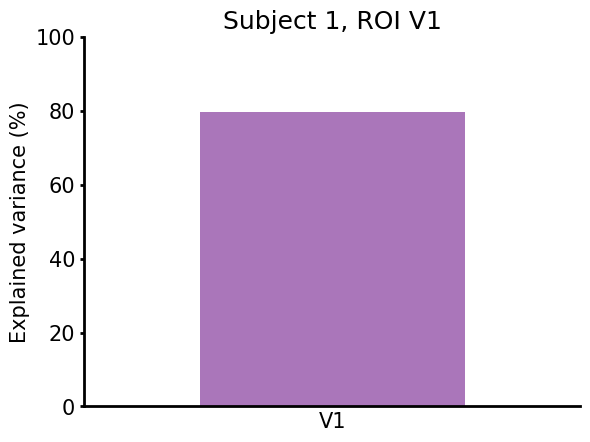

In [ ]:
# Load the encoding accuracy
metadata = ned_object.get_metadata(
    modality='fmri',
    train_dataset='nsd',
    model='fwrf',
    subject=sub,
    roi=roi
    )

# Plot parameters
fontsize = 15
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.major.size'] = 3
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 3
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['lines.markersize'] = 3
colors = [(170/255, 118/255, 186/255)]

# Plot the mean noise-ceiling normalized encoding accuracy
encoding_acc = np.mean(metadata['encoding_models']['encoding_accuracy']\
    ['noise_normalized_encoding']) * 100
plt.plot()
plt.bar(1, encoding_acc, color=colors[0])
plt.ylabel('Explained variance (%)',
    fontsize=fontsize)
plt.ylim(bottom=0, top=100)
plt.xlabel(roi, fontsize=fontsize)
plt.xticks([])
plt.xlim(left=0.25, right=1.75);
title = 'Subject ' + str(sub) + ', ROI ' + roi
plt.title(title);

Here you will plot the voxel-wise encoding accuracy scores (*r*² scores) against the corresponding noise ceiling scores, on a scatterplot.

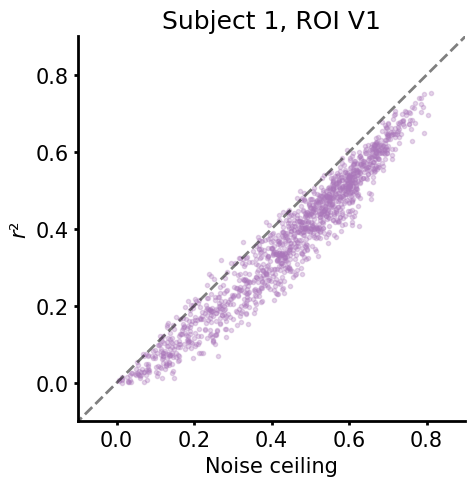

In [ ]:
r2 = metadata['encoding_models']['encoding_accuracy']['r2']
noise_ceiling = metadata['encoding_models']['encoding_accuracy']['noise_ceiling']

plt.figure(figsize=(5,5))
plt.plot(np.arange(-1,1.1,.1), np.arange(-1,1.1,.1), '--k', linewidth=2,
    alpha=.5)
plt.scatter(noise_ceiling, r2, color=colors[0], alpha=.3)
plt.ylabel('$r$²', fontsize=fontsize)
plt.ylim(bottom=-.1, top=.9)
plt.xlabel('Noise ceiling', fontsize=fontsize)
plt.xlim(left=-.1, right=.9);
title = 'Subject ' + str(sub) + ', ROI ' + roi
plt.title(title);

## 1.3 | Load the in silico fMRI responses

Now you will load and visualize the in silico fMRI responses and corresponding metadata using the [`load_synthetic_neural_responses`][ned_git_func] function from [NED's Python package][ned_git].

The `load_synthetic_neural_responses` function takes the following input parameters:
* `modality` (str): Data modality of the in silico neural responses. Here, we use 'fmri'.
* `train_dataset` (str): Dataset on which NED's encoding models are trained. Here, we use 'nsd'.
* `model` (str): trained encoding model type. Here, we use 'fwrf', which consists in the feature-weighted receptive field model introduced in ([St-Yves & Naselaris, 2018][fwrf]).
* `imageset` (str): Imageset for which the fMRI responses are synthesized. If 'nsd', load in silico neural responses for the 73,000 NSD images. If 'imagenet_val', load in silico neural responses for the 50,000 ILSVRC-2012 validation images. If 'things', load in silico neural responses for the 26,107 images from the THINGS database.
* `subject` (int): Subject number for which the fMRI image responses are synthesized.
* `roi` (str): Name of the Region of Interest (ROI) for which the fMRI image responses are synthesized.
* `return_metadata` (bool): If True, return fMRI medatata along with the in silico fMRI responses.

And returns the following variables:
* `synthetic_fmri`: in silico fMRI responses organized in a 2-D array of shape (N images × M voxels), where the image dimension matches the image amount of the chosen image set.
* `metadata`: metadata related to the in silico fMRI responses.

[ned_git_func]: https://github.com/gifale95/NED/blob/main/ned/ned.py#L438
[ned_git]: https://github.com/gifale95/NED
[fwrf]: https://doi.org/10.1016/j.neuroimage.2017.06.035

In [ ]:
synthetic_fmri, metadata = ned_object.load_synthetic_neural_responses(
	modality='fmri',
	train_dataset='nsd',
	model='fwrf',
	imageset=imageset,
	subject=sub,
	roi=roi,
	return_metadata=True
	)

# Visualize the in silico fMRI data dimensions
print('In silico fMRI data shape:')
print(synthetic_fmri.shape)
print('(Images × Voxels)')

In-silico fMRI data shape:
(73000, 1350)
(Images × Voxels)


## 1.4 | Link the in silico fMRI responses to the corresponding images

Here you will match the in silico fMRI responses to the corresponding images. You will start by accessing the image sets. Since the [NSD][nsd], [ILSVRC-2012][imagenet], and [THINGS][things] image sets are organized following different directory structures, you will access each of them in a different way.

<font color='red'><b>NOTE:</b></font> **Prior to using the NSD images you are required to fill out the [NSD Data Access Agreement][nsd_access].**

[nsd_access]: https://forms.gle/eT4jHxaWwYUDEf2i9
[nsd]: https://naturalscenesdataset.org/
[imagenet]: https://www.image-net.org/challenges/LSVRC/2012/index.php
[things]: https://things-initiative.org/

In [ ]:
# Access the image sets
if imageset == 'nsd':
    imageset_dir = os.path.join(ned_dir, 'synthetic_neural_responses',
        'imagesets', 'imageset-nsd', 'nsd_stimuli.hdf5')
    images = h5py.File(imageset_dir, 'r')
    images = images.get('imgBrick')
elif imageset == 'imagenet_val':
    imageset_dir = os.path.join(ned_dir, 'synthetic_neural_responses',
        'imagesets', 'imageset-imagenet_val')
    images = torchvision.datasets.ImageNet(root=imageset_dir, split='val')
elif imageset == 'things':
    images = metadata['things_labels']['image_paths']

Here you can choose an image (indexing is zero-based), and link it to the corresponding in silico fMRI response.

In [ ]:
# Choose the image
if imageset == 'nsd':
    nsd_img = 0 # @param {type:"slider", min:0, max:72999, step:1}
    img_idx = nsd_img
elif imageset == 'imagenet_val':
    imagenet_img = 0 # @param {type:"slider", min:0, max:49999, step:1}
    img_idx = imagenet_img
elif imageset == 'things':
    things_img = 0 # @param {type:"slider", min:0, max:26106, step:1}
    img_idx = things_img

# Link the image to the corresponding in silico fMRI response
print('In silico fMRI image response shape:')
print(synthetic_fmri[img_idx].shape)
print('(Voxels)')

In-silico fMRI image response shape:
(1350,)
(Voxels)


And now you will load and visualize the image you chose, along with optional metadata (e.g., image category).

Since the ILSVRC-2012 images are rectangular, we center cropped them to square format prior to feeding them to encoding models to synthesize their corresponding fMRI responses. Here you will apply the same center cropping when loading these images. The NSD and THINGS images are already in square format, and therefore do not require any cropping.

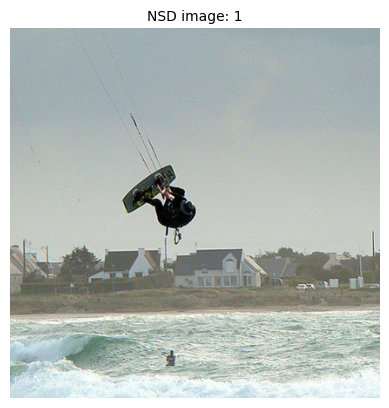

In [ ]:
# Load the selected image
if imageset == 'nsd':
    img = images[img_idx]
elif imageset == 'imagenet_val':
    img, _ = images.__getitem__(img_idx)
    transform = trn.Compose([trn.CenterCrop(min(img.size))])
    img = transform(img)
elif imageset == 'things':
    img_dir = os.path.join(ned_dir, 'synthetic_neural_responses', 'imagesets',
        'imageset-things', 'images', images[img_idx])
    img = Image.open(img_dir).convert('RGB')

# Visualize the image (along with optional metadata)
plt.figure()
plt.axis('off')
plt.imshow(img)
if imageset == 'nsd':
    title = 'NSD image: ' + str(img_idx+1)
elif imageset == 'imagenet_val':
    label_number = metadata['imagenet_val_labels']['label_number'][img_idx]
    label_name = metadata['imagenet_val_labels']['label_names'][label_number]
    title = 'ILSVRC-2012 validation image: ' + str(img_idx+1) + \
        '\nCategory number: ' + str(label_number+1) + \
        '\nCategory name: ' + label_name
elif imageset == 'things':
    object_concept_number = \
        metadata['things_labels']['image_concept_index'][img_idx]
    object_concept_name = \
        metadata['things_labels']['unique_id'][object_concept_number]
    file_name = \
        metadata['things_labels']['image_paths'][img_idx]
    title = 'THINGS image: ' + str(img_idx+1) + \
        '\nObject concept number: ' + str(object_concept_number+1) + \
        '\nObject concept name: ' + object_concept_name + \
        '\nFile name: ' + file_name
plt.title(title, fontsize=10);

# 2 | Multivariate RNC

Now you will use multivariate RNC to investigate representational relationships between the multivariate responses of two ROIs of your choice, out of the 23 available visual ROIs (e.g., V1 vs. V4, FFA-1 vs. PPA, EBA vs. OWFA). To compare the in silico multivariate fMRI responses of two ROIs, you will first transform their responses into representational similarity matrices (RSMs) ([Kriegeskorte et al., 2008][kriegeskorte]). Next you will use genetic optimization ([Yamane et al., 2008][yamane]; [Vaziri et al., 2014][vaziri]; [Ponce et al., 2019][ponce]; [Xiao & Kreiman, 2020][xiao]) to search for a controlling image batch that aligns or disentangles the RSMs of the two ROIs being compared, as measured with representational similarity analysis (RSA) ([Kriegeskorte et al., 2008][kriegeskorte]).

Alignment consists in an image batch leading to a high RSA correlation score (i.e., Pearson's *r*) for the representational similarity matrices (RSMs) of the two ROIs. Disentanglement consists in an image batch leading to a low absolute RSA correlation score for the RSMs of the two ROIs. Alignment and disentanglement highlight representational similarities and differences between the two ROIs – that is, their shared and unique representational content.

You will apply multivariate RNC on the in silico fMRI responses of the 8 NSD subjects for images from one of three image sets (the 73,000 images from NSD, the 50,000 images from the ILSVRC-2012 validation split, or the 26,107 images from the THINGS database). You will use the in silico fMRI responses of a subset of these subjects to select the controlling images that either align or disentangle the multivariate responses of the two chosen ROIs. You will then cross-validate these controlling images on the in silico multivariate fMRI responses of the remaining subjects.

[yamane]: https://doi.org/10.1038/nn.2202
[vaziri]: https://doi.org/10.1016/j.neuron.2014.08.043
[ponce]: https://doi.org/10.1016/j.cell.2019.04.005
[xiao]: https://doi.org/10.1371/journal.pcbi.1007973
[kriegeskorte]: https://doi.org/10.3389/neuro.06.004.2008

## 2.0 | Multivariate RNC algorithmic description

![](https://drive.google.com/uc?export=view&id=1ojrApVmr24Qq0oBfHxyN65qXShAvsgzS)

Multivariate RNC searches for stimulus images leading to aligned or disentangled in silico multivariate fMRI responses of two visual brain areas. Random batches of images are fed to the trained encoding models of two areas, and the resulting in silico fMRI responses are transformed into representational similarity matrices (RSMs), yielding one RSM for each image batch and area. The RSMs of the two areas are then compared through a Pearson's correlation, obtaining one correlation score (*r*) for each image batch, and the correlation scores ranked. To align the two areas, the image batches with highest correlation scores (i.e., containing images most similarly represented by the two areas) undergo a genetic optimization (which involves keeping these image batches, creating mutated versions of them, and adding random image batches), resulting in new image batches likely to better align the two areas. Finally, these new image batches are once again fed to the encoding models, and the same steps are repeated over a new generation. To disentangle the two areas the image batches with lowest absolute correlation scores (i.e., containing images most differently represented by the two areas) are instead genetically optimized, resulting in new image batches likely to better disentangle the two areas. After many genetic optimization generations, this results in one of two sets of controlling images, each set corresponding to a different neural control condition (the image batches from the two neural control conditions are optimized independently from each other). The controlling images from the ranked correlation vector lead both areas to have aligned multivariate responses (i.e., images leading to high Pearson's *r* scores for the two areas), whereas the controlling images from the absolute ranked correlation vector lead both areas to have disentangled multivariate responses (i.e., images leading to low absolute Pearson's *r* scores for the two areas).

## 2.1 | Hyperparameters and random seed setup

Here you can edit the multivariate RNC hyperparameters:
* `roi_1`: string indicating the first ROI of the pairwise ROI comparison.
* `roi_2`: string indicating the second ROI of the pairwise ROI comparison.
* `select_subjects`: list containing the indices of the subjects used to select the controlling images (out of the 8 NSD subjects).
* `eval_subjects`: list containing the indices of the subjects used to evaluate the controlling images (out of the 8 NSD subjects); for cross-validation, this list should contain different subjects than the `select_subjects` variable.
* `imageset`: string with the image set used; you will apply multivariate RNC on the in silico fMRI responses for images included in this image set.
* `n_used_images`: integer indicating the number of (randomly chosen) images actually used from the chosen dataset; increasing the amount of used images will increase multivariate RNC's running time.
* `ncsnr_threshold`: float (between 0 and 1) indicating the noise ceiling signal-to-noise-ratio threshold of each voxel; only voxels with noise ceiling signal-to-noise-ratio scores above this threshold will be used to compare multivariate responses of the selected ROIs (so to prevent results being biased toward noisy voxels).
* `generations`: integer indicating the number of genetic algorithm optimization generations; increasing the amount of generations will increase multivariate RNC's running time.
* `n_batches`: integer indicating the initial number of image batches at each genetic optimization generation; increasing the amount of batches will increase multivariate RNC's running time.
* `n_images_per_batch`: integer indicating the amount of images per image batch, which also corresponds to the number of controlling images; increasing the amount of images per batch will increase multivariate RNC's running time.
* `null_dist_samples`: integer indicating the number of samples used to compute multivariate RNC's null distribution.

<font color='red'><b>NOTE:</b></font> **The `n_images_per_batch` value should be lower than the `n_used_images` value.**

In [ ]:
# Used ROIs
roi_1 = 'V1' # @param ["V1", "V2", "V3", "hV4", "EBA", "FBA-2", "OFA", "FFA-1", "FFA-2", "OPA", "PPA", "RSC", "OWFA", "VWFA-1", "VWFA-2", "mfs-words", "early", "midventral", "midlateral", "midparietal", "ventral", "lateral", "parietal"] {allow-input: true}
roi_2 = 'hV4' # @param ["V1", "V2", "V3", "hV4", "EBA", "FBA-2", "OFA", "FFA-1", "FFA-2", "OPA", "PPA", "RSC", "OWFA", "VWFA-1", "VWFA-2", "mfs-words", "early", "midventral", "midlateral", "midparietal", "ventral", "lateral", "parietal"] {allow-input: true}

# Selection and evaluation subjects
select_subjects = [2, 3, 4, 5, 6, 7, 8] # @param {allow-input: true}
eval_subjects = [1] # @param {allow-input: true}

# Image set
imageset = "nsd" # @param ["nsd", "imagenet_val", "things"] {allow-input: true}
n_used_images = 300 # @param {type:"slider", min:1, max:73000, step:1}

# Other hyperparameters
ncsnr_threshold = 0.5 # @param {type:"slider", min:0, max:1, step:0.01}
generations = 500 # @param {type:"slider", min:1, max:2000, step:1}
n_batches = 100 # @param {type:"slider", min:1, max:500, step:1}
n_images_per_batch = 50 # @param {type:"slider", min:1, max:200, step:1}
null_dist_samples = 10000 # @param ["100", "1000", "10000", "100000"] {type:"raw", allow-input: true}

Some of the following blocks of code involve stochastic operations. You can set a random seed to ensure reproducible results across multiple runs.

In [ ]:
seed = 20200220
np.random.seed(seed)
random.seed(seed)

## 2.2 | Load the in silico fMRI responses, and transform them into RSMs

You will start by loading the in silico fMRI responses for the selected image set, and transform them into RSMs. In doing so the ROI multivariate responses will be mapped to a common format (i.e., RSM space) thus allowing comparison of the two ROIs. To reduce the impact of noisy voxels on the ensuing multivariate RNC image selection process, the RSM creation only uses voxels with noise ceiling signal-to-noise-ratio scores above the `ncsnr_threshold` variable.

The in silico fMRI RSMs are split into selection and evaluation partitions based on the `select_subjects` and `eval_subjects` variables, and averaged across all subjects within each partition. The purpose of this averaging is to boost the signal common across subjects, thus increasing the generalizability of results.

This will results in 2-D RSM arrays of shape (N images × N images) for each ROI, and for both the selection and evaluation subjects.

In [ ]:
# To reduce compute time you'll only be using a portion of randomly selected
# images from all images of the chosen image set
if imageset == 'nsd':
    n_images = 73000
elif imageset == 'imagenet_val':
    n_images = 50000
elif imageset == 'things':
    n_images = 26107
idx_all_imgs = np.arange(n_images)
idx_used_imgs = np.random.choice(np.arange(n_images), size=n_used_images,
    replace=False)
idx_used_imgs.sort()

# RSMs 3-D arrays of shape:
# (N subjects × N Images × N Images)
rsm_select_roi_1 = np.zeros((len(select_subjects), n_used_images,
    n_used_images), dtype=np.float32)
rsm_select_roi_2 = np.zeros((len(select_subjects), n_used_images,
    n_used_images), dtype=np.float32)
rsm_eval_roi_1 = np.zeros((len(eval_subjects), n_used_images, n_used_images),
    dtype=np.float32)
rsm_eval_roi_2 = np.zeros((len(eval_subjects), n_used_images, n_used_images),
    dtype=np.float32)

# Load the in silico fMRI responses
all_subjects = list(set(select_subjects).union(set(eval_subjects)))
for r, roi in enumerate([roi_1, roi_2]):
    idx_select = 0
    idx_eval = 0
    for s, sub in tqdm(enumerate(all_subjects), desc=roi, total=len(all_subjects)):
        fmri, metadata = ned_object.load_synthetic_neural_responses(
            modality='fmri',
            train_dataset='nsd',
            model='fwrf',
            imageset=imageset,
            subject=sub,
            roi=roi,
            return_metadata=True
            )

        # Create the RSMs (using only the randomly selected portion of images,
        # and using only voxels with noise ceiling signal-to-noise ratio scores
        # above the selected threshold)
        fmri = fmri[idx_used_imgs]
        fmri = fmri[:,metadata['fmri']['ncsnr']>ncsnr_threshold]
        rsm = np.ones((n_used_images,n_used_images))
        for i1 in range(len(fmri)):
            for i2 in range(i1):
                rsm[i1,i2] = pearsonr(fmri[i1], fmri[i2])[0]
        del fmri

        # Split the RSMs into selection and evaluation partitions
        if sub in select_subjects:
            if r == 0:
                rsm_select_roi_1[idx_select] = rsm
            else:
                rsm_select_roi_2[idx_select] = rsm
            idx_select += 1
        if sub in eval_subjects:
            if r == 0:
                rsm_eval_roi_1[idx_eval] = rsm
            else:
                rsm_eval_roi_2[idx_eval] = rsm
            idx_eval += 1
        del rsm

# Average the RSMs across subjects (within partitions)
rsm_select_roi_1 = np.mean(rsm_select_roi_1, 0)
rsm_select_roi_2 = np.mean(rsm_select_roi_2, 0)
rsm_eval_roi_1 = np.mean(rsm_eval_roi_1, 0)
rsm_eval_roi_2 = np.mean(rsm_eval_roi_2, 0)

# Print the selection partition ROI 1 RSM shape
print('\n\nSelection partition ' + roi_1 + ' RSM shape:')
print(rsm_select_roi_1.shape)
print('(Images × Images)')

# Print the selection partition ROI 2 RSM shape
print('\n\nSelection partition ' + roi_2 + ' RSM shape:')
print(rsm_select_roi_2.shape)
print('(Images × Images)')

# Print the evaluation partition ROI 1 RSM shape
print('\n\nEvaluation partition ' + roi_1 + ' RSM shape:')
print(rsm_eval_roi_1.shape)
print('(Images × Images)')

# Print the evaluation partition ROI 2 RSM shape
print('\n\nEvaluation partition ' + roi_2 + ' RSM shape:')
print(rsm_eval_roi_2.shape)
print('(Images × Images)')

hV4: 100%|██████████| 8/8 [08:25<00:00, 63.23s/it]



Selection partition V1 RSM shape:
(300, 300)
(Images × Images)


Selection partition hV4 RSM shape:
(300, 300)
(Images × Images)


Evaluation partition V1 RSM shape:
(300, 300)
(Images × Images)


Evaluation partition hV4 RSM shape:
(300, 300)
(Images × Images)


## 2.3 | Multivariate RNC baseline

You will now use the `select_subjects` RSMs (from the `rsm_select_roi_*` variables) to select the images leading to baseline RSA scores, for each of the two chosen ROIs, against which you will test the RSA scores for the controlling images.

To compute the baseline of each ROI, you will randomly select a batch of X images (out of all images used to create the RSMs, where X is defined by the `n_images_per_batch` variable) and perform RSA between the two ROIs (i.e., correlate the RSMs of the two ROIs) using only the RSM entries corresponding to the X images from this batch, resulting in one RSA correlation score.

By repeating this step N times (where N is defined by the `null_dist_samples` variable) you will create the multivariate RNC null distribution and then select the X images from the batch with score closest to the null distribution's mean. The RSA score for these X images consists in the multivariate RNC baseline. Furthermore, you will then visually compare these baseline images with the controlling images selected by univariate RNC.

In [ ]:
# Null distribution images 2-D array of shape:
# (N Null distribution samples × Y Images)
null_dist_images = np.zeros((null_dist_samples, n_images_per_batch),
    dtype=np.int32)
# Null distribution scores 1-D arrays of shape:
# (N Null distribution samples)
null_dist_select = np.zeros((null_dist_samples), dtype=np.float32)

# Create the null distribution
idx_tril = np.tril_indices(n_images_per_batch, -1)
for i in tqdm(range(null_dist_samples), desc='Null distribution samples'):
    sample = np.random.choice(np.arange(len(rsm_select_roi_1)),
        size=n_images_per_batch, replace=False)
    sample.sort()
    null_dist_images[i] = sample
    rsm_roi_1 = rsm_select_roi_1[sample]
    rsm_roi_1 = rsm_roi_1[:,sample]
    rsm_roi_2 = rsm_select_roi_2[sample]
    rsm_roi_2 = rsm_roi_2[:,sample]
    null_dist_select[i] = pearsonr(rsm_roi_1[idx_tril], rsm_roi_2[idx_tril])[0]
    del sample

# Select the image sample closest to the selection split null distribution mean
null_dist_mean = np.mean(null_dist_select)
idx_baseline = np.argsort(abs(null_dist_select - null_dist_mean))[0]

Null distribution samples: 100%|██████████| 10000/10000 [00:13<00:00, 727.41it/s]


## 2.4 | Select the controlling images using the RSMs of the selection subjects

Now you will use the `select_subjects` RSMs to select the controlling images, that is, the images aligning and disentangling the in silico fMRI multivariate responses of two ROIs.

Through genetic optimization you will search for a batch of X images (out of all images used to create the RSMs, where X is defined by the `n_images_per_batch` variable) that either aligns or disentangles the in silico multivariate fMRI responses of the two ROIs being compared. Alignment consists of an image batch leading to a high RSA correlation score between the two ROIs, whereas disentanglement consists of an image batch leading to a low absolute RSA correlation score between the two ROIs.

### 2.4.0 | Genetic optimization utility functions

In [ ]:
def create_batches(n_batches, n_images_per_batch, n_used_images):
    """Create random image batches.

    Parameters
    ----------
    n_batches : int
        Initial number of image batches at each genetic optimization generation.
    n_images_per_batch : int
        Number of images per batch.
    n_used_images : int
        Total amount of used images.

    Returns
    -------
    image_batches : int
        Random image batches.

    """

    image_batches = np.zeros((n_batches,n_images_per_batch), dtype=int)
    for b in range(n_batches):
        image_batches[b,:] = resample(np.arange(n_used_images), replace=False,
            n_samples=n_images_per_batch)

    return image_batches


def mutate(image_batches, n_used_images):
    """Five mutated versions are created for each image batch, where for each
    version a different amount of images (1, 10%, 25%, 50%, and 75%) is randomly
    replaced with other images from the ROI RSMs, while ensuring that no image
    is repeated within the same batch.

    Parameters
    ----------
    image_batches : int
        Image batches that are mutated.
    n_used_images : int
        Total amount of used images.

    Returns
    -------
    mutated_image_batches : int
        Mutated image batches.

    """

    # Establish how many images will be mutated
    mutated_images = []
    mutated_images.append(1)
    mutated_images.append(round(image_batches.shape[1] / 100 * 10))
    mutated_images.append(round(image_batches.shape[1] / 100 * 25))
    mutated_images.append(round(image_batches.shape[1] / 100 * 50))
    mutated_images.append(round(image_batches.shape[1] / 100 * 75))
    mutated_images = np.asarray(mutated_images)

    # Mutate the image batches
    mutated_image_batches = []
    for b in range(image_batches.shape[0]):
        # Select new images not already present in the image batch
        new_imgs_pool = np.isin(np.arange(n_used_images), image_batches[b],
            assume_unique=True, invert=True)
        for m in range(len(mutated_images)):
            # Randomly select the images which will be mutated
            mutated_imgs_idx = resample(np.arange(len(image_batches[b])),
                replace=False, n_samples=mutated_images[m])
            # Randomly select the new images
            new_imgs = resample(np.where(new_imgs_pool)[0], replace=False,
                n_samples=mutated_images[m])
            # Replace the images
            mutated_chromosome = copy(image_batches[b])
            mutated_chromosome[mutated_imgs_idx] = new_imgs
            mutated_image_batches.append(mutated_chromosome)
    mutated_image_batches = np.asarray(mutated_image_batches)

    return mutated_image_batches


def evaluate(image_batches, rsm_roi_1, rsm_roi_2):
    """Use the image conditions from the image batches to compare, through RSA,
    the RSMs of the two ROIs. This will result in one correlation score for each
    image batch, indicating how well each batch aligns (or disentangles) the
    RSMs of the two ROIs.

    Parameters
    ----------
    image_batches : int
        Image batches used to compare the RSMs of the two ROIs.
    rsm_roi_1 : float
        First ROI RSM.
    rsm_roi_2 : float
        Second ROI RSM.

    Returns
    -------
    image_batches_scores : float
        RSA scores for each image batch.

    """

    image_batches_scores = np.zeros((len(image_batches)))
    idx_lower_tr = np.tril_indices(image_batches.shape[1], -1)

    for b in range(len(image_batches)):
        roi_1 = rsm_roi_1[image_batches[b]]
        roi_1 = roi_1[:,image_batches[b]]
        roi_1 = roi_1[idx_lower_tr]
        roi_2 = rsm_roi_2[image_batches[b]]
        roi_2 = roi_2[:,image_batches[b]]
        roi_2 = roi_2[idx_lower_tr]
        image_batches_scores[b] = pearsonr(roi_1, roi_2)[0]

    return image_batches_scores


def select(control_condition, image_batches, image_batches_scores, n_batches):
    """Select and retain the best image batches, based on their RSA scores.s. To
    align the two ROIs, the image batches leading to highest correlation score
    (i.e., r=1) are kept. To disentangle the two ROIs, the image batches leading
    to lowest absolute correlation score (i.e, r=0) are kept.

    Parameters
    ----------
    control_condition : str
        String indicating whether to search for 'align' or 'disentangle' image
        batches.
    image_batches : int
        Image batches.
    image_batches_scores : float
        RSA score of each image batch.
    n_batches : int
        Initial number of image batches at each genetic optimization generation.

    Returns
    -------
    image_batches : int
        Selected image batches.
    image_batches_scores : float
        RSA scores of the selected image batches.

    """

    if control_condition == 'align':
        idx_best = np.argsort(image_batches_scores)[::-1]
    elif control_condition == 'disentangle':
        idx_best = np.argsort(abs(image_batches_scores))
    image_batches = image_batches[idx_best][:n_batches]
    image_batches_scores = image_batches_scores[idx_best][:n_batches]

    return image_batches, image_batches_scores

### 2.4.1 | Randomly create the first generation of image batches

You will begin by randomly creating the initial generation of N image batches (where N is defined by the `n_batches` variable). These batches all consist of images previously used to create the RSMs.

Separate image batches are created for the alignment and disentanglement neural control conditions, since the image batches of these two neural control conditions will be independently (genetically) optimized.

In [ ]:
# Randomly create the first generation of image batches
image_batches_align = create_batches(n_batches, n_images_per_batch,
    n_used_images)
image_batches_disentangle = create_batches(n_batches, n_images_per_batch,
    n_used_images)

# Print the initial alignment image batches shape
print('Initial alignment image batches shape:')
print(image_batches_align.shape)
print('(Batches × Images per batch)')

# Print the initial disentanglement image batches shape
print('\n\nInitial alignment image batches shape:')
print(image_batches_disentangle.shape)
print('(Batches × Images per batch)')

Initial alignment image batches shape:
(100, 50)
(Batches × Images per batch)


Initial alignment image batches shape:
(100, 50)
(Batches × Images per batch)


### 2.4.2 | Genetic optimization

Here you will use genetic optimization to find images that well align and disentangle the RSMs of the two ROIs, through RSA.

At the beginning of each genetic optimization generation you will augment the image batches following exploitation and exploration. Exploitation involves creating five mutated versions for each of the image batches, where in each version a different amount of batch images is randomly replaced with other images (while ensuring that no image is repeated within the same batch). Exploration involves creating new random image batches.

Next, you will perform RSA between the two ROIs' in silico fMRI multivariate responses for the augmented image batches, resulting in one RSA correlation score per image batch.

Finally, to align the two ROIs you will keep the N image batches (where N is defined by the `n_batches` variable) with highest correlation scores (i.e., containing images most similarly represented by the two ROIs), whereas to disentangle them you will keep the N image batches with lowest absolute correlation scores (i.e., containing images most differently represented by the two ROIs). These image batches are then passed to the next genetic otpimization generation, where the same steps are repeated.

In [ ]:
# These variables will store the best image batch from each generation, along
# with its RSA score
best_batches_align = np.zeros((generations, n_images_per_batch), dtype=int)
best_scores_align = np.zeros((generations))
best_batches_disentangle = np.zeros((generations, n_images_per_batch),
    dtype=int)
best_scores_disentangle = np.zeros((generations))

# Initiate the generations loop
desc = 'Generation'
for g in tqdm(range(generations), desc=desc):

    # Augment the image batches via mutations (exploitation)
    mutated_image_batches_align = mutate(image_batches_align, n_used_images)
    image_batches_align = np.append(image_batches_align,
        mutated_image_batches_align, 0)
    mutated_image_batches_disentangle = mutate(image_batches_disentangle,
        n_used_images)
    image_batches_disentangle = np.append(image_batches_disentangle,
        mutated_image_batches_disentangle, 0)

    # Augment the image batches with new random batches (exploration)
    new_image_batches_align = create_batches(len(image_batches_align),
        n_images_per_batch, n_used_images)
    image_batches_align = np.append(image_batches_align,
        new_image_batches_align, 0)
    new_image_batches_disentangle = create_batches(
        len(image_batches_disentangle), n_images_per_batch, n_used_images)
    image_batches_disentangle = np.append(image_batches_disentangle,
        new_image_batches_disentangle, 0)

    # Evaluate each image batch on the selection subjects' RSMs using Pearson's
    # R
    image_batches_align.sort(1)
    image_batches_disentangle.sort(1)
    image_batches_scores_align = evaluate(image_batches_align, rsm_select_roi_1,
        rsm_select_roi_2)
    image_batches_scores_disentangle = evaluate(image_batches_disentangle,
        rsm_select_roi_1, rsm_select_roi_2)

    # Only retain the best image batches of each generation
    image_batches_align, image_batches_scores_align = select('align',
        image_batches_align, image_batches_scores_align, n_batches)
    image_batches_disentangle, image_batches_scores_disentangle = select(
        'disentangle', image_batches_disentangle,
        image_batches_scores_disentangle, n_batches)

    # Store the best image batch of each generation, along with its score
    best_batches_align[g] = image_batches_align[0]
    best_scores_align[g] = image_batches_scores_align[0]
    best_batches_disentangle[g] = image_batches_disentangle[0]
    best_scores_disentangle[g] = image_batches_scores_disentangle[0]

    # Print the best image batch RSA score
    print('\nAlignment RSA score: ' + str(round(best_scores_align[g], 3)))
    print('Disentanglement RSA score: ' +
        str(round(best_scores_disentangle[g], 3)))
    print('\n')

Generation:   0%|          | 1/500 [00:43<6:05:12, 43.91s/it]


Alignment RSA score: 0.688
Disentanglement RSA score: 0.363




Generation:   0%|          | 2/500 [00:47<2:46:04, 20.01s/it]


Alignment RSA score: 0.694
Disentanglement RSA score: 0.363




Generation:   1%|          | 3/500 [00:51<1:46:52, 12.90s/it]


Alignment RSA score: 0.698
Disentanglement RSA score: 0.351




Generation:   1%|          | 4/500 [00:54<1:15:09,  9.09s/it]


Alignment RSA score: 0.72
Disentanglement RSA score: 0.324




Generation:   1%|          | 5/500 [00:58<57:32,  6.97s/it]  


Alignment RSA score: 0.737
Disentanglement RSA score: 0.324




Generation:   1%|          | 6/500 [01:01<46:52,  5.69s/it]


Alignment RSA score: 0.746
Disentanglement RSA score: 0.322




Generation:   1%|▏         | 7/500 [01:05<43:22,  5.28s/it]


Alignment RSA score: 0.749
Disentanglement RSA score: 0.308




Generation:   2%|▏         | 8/500 [01:09<38:13,  4.66s/it]


Alignment RSA score: 0.759
Disentanglement RSA score: 0.306




Generation:   2%|▏         | 9/500 [01:12<34:24,  4.21s/it]


Alignment RSA score: 0.759
Disentanglement RSA score: 0.298




Generation:   2%|▏         | 10/500 [01:15<31:54,  3.91s/it]


Alignment RSA score: 0.764
Disentanglement RSA score: 0.286




Generation:   2%|▏         | 11/500 [01:19<32:49,  4.03s/it]


Alignment RSA score: 0.775
Disentanglement RSA score: 0.276




Generation:   2%|▏         | 12/500 [01:23<31:15,  3.84s/it]


Alignment RSA score: 0.775
Disentanglement RSA score: 0.276




Generation:   3%|▎         | 13/500 [01:26<29:38,  3.65s/it]


Alignment RSA score: 0.775
Disentanglement RSA score: 0.276




Generation:   3%|▎         | 14/500 [01:29<29:10,  3.60s/it]


Alignment RSA score: 0.775
Disentanglement RSA score: 0.276




Generation:   3%|▎         | 15/500 [01:34<30:59,  3.83s/it]


Alignment RSA score: 0.783
Disentanglement RSA score: 0.275




Generation:   3%|▎         | 16/500 [01:37<29:51,  3.70s/it]


Alignment RSA score: 0.785
Disentanglement RSA score: 0.266




Generation:   3%|▎         | 17/500 [01:40<28:33,  3.55s/it]


Alignment RSA score: 0.785
Disentanglement RSA score: 0.266




Generation:   4%|▎         | 18/500 [01:44<27:39,  3.44s/it]


Alignment RSA score: 0.789
Disentanglement RSA score: 0.251




Generation:   4%|▍         | 19/500 [01:48<29:28,  3.68s/it]


Alignment RSA score: 0.791
Disentanglement RSA score: 0.251




Generation:   4%|▍         | 20/500 [01:51<29:15,  3.66s/it]


Alignment RSA score: 0.791
Disentanglement RSA score: 0.247




Generation:   4%|▍         | 21/500 [01:55<28:07,  3.52s/it]


Alignment RSA score: 0.798
Disentanglement RSA score: 0.247




Generation:   4%|▍         | 22/500 [01:58<27:22,  3.44s/it]


Alignment RSA score: 0.801
Disentanglement RSA score: 0.242




Generation:   5%|▍         | 23/500 [02:02<28:42,  3.61s/it]


Alignment RSA score: 0.805
Disentanglement RSA score: 0.242




Generation:   5%|▍         | 24/500 [02:06<28:59,  3.65s/it]


Alignment RSA score: 0.805
Disentanglement RSA score: 0.242




Generation:   5%|▌         | 25/500 [02:09<28:00,  3.54s/it]


Alignment RSA score: 0.809
Disentanglement RSA score: 0.238




Generation:   5%|▌         | 26/500 [02:12<27:08,  3.43s/it]


Alignment RSA score: 0.809
Disentanglement RSA score: 0.232




Generation:   5%|▌         | 27/500 [02:16<28:11,  3.58s/it]


Alignment RSA score: 0.809
Disentanglement RSA score: 0.216




Generation:   6%|▌         | 28/500 [02:20<28:49,  3.66s/it]


Alignment RSA score: 0.812
Disentanglement RSA score: 0.216




Generation:   6%|▌         | 29/500 [02:23<27:39,  3.52s/it]


Alignment RSA score: 0.815
Disentanglement RSA score: 0.216




Generation:   6%|▌         | 30/500 [02:26<26:56,  3.44s/it]


Alignment RSA score: 0.817
Disentanglement RSA score: 0.216




Generation:   6%|▌         | 31/500 [02:30<27:46,  3.55s/it]


Alignment RSA score: 0.822
Disentanglement RSA score: 0.216




Generation:   6%|▋         | 32/500 [02:34<28:23,  3.64s/it]


Alignment RSA score: 0.824
Disentanglement RSA score: 0.215




Generation:   7%|▋         | 33/500 [02:37<27:18,  3.51s/it]


Alignment RSA score: 0.824
Disentanglement RSA score: 0.215




Generation:   7%|▋         | 34/500 [02:40<26:27,  3.41s/it]


Alignment RSA score: 0.83
Disentanglement RSA score: 0.213




Generation:   7%|▋         | 35/500 [02:44<27:16,  3.52s/it]


Alignment RSA score: 0.83
Disentanglement RSA score: 0.207




Generation:   7%|▋         | 36/500 [02:48<28:16,  3.66s/it]


Alignment RSA score: 0.833
Disentanglement RSA score: 0.206




Generation:   7%|▋         | 37/500 [02:51<27:15,  3.53s/it]


Alignment RSA score: 0.833
Disentanglement RSA score: 0.206




Generation:   8%|▊         | 38/500 [02:55<26:28,  3.44s/it]


Alignment RSA score: 0.839
Disentanglement RSA score: 0.202




Generation:   8%|▊         | 39/500 [02:58<27:03,  3.52s/it]


Alignment RSA score: 0.839
Disentanglement RSA score: 0.202




Generation:   8%|▊         | 40/500 [03:02<28:07,  3.67s/it]


Alignment RSA score: 0.839
Disentanglement RSA score: 0.202




Generation:   8%|▊         | 41/500 [03:05<26:59,  3.53s/it]


Alignment RSA score: 0.841
Disentanglement RSA score: 0.201




Generation:   8%|▊         | 42/500 [03:09<26:12,  3.43s/it]


Alignment RSA score: 0.841
Disentanglement RSA score: 0.195




Generation:   9%|▊         | 43/500 [03:12<26:39,  3.50s/it]


Alignment RSA score: 0.845
Disentanglement RSA score: 0.195




Generation:   9%|▉         | 44/500 [03:17<28:11,  3.71s/it]


Alignment RSA score: 0.849
Disentanglement RSA score: 0.195




Generation:   9%|▉         | 45/500 [03:20<27:08,  3.58s/it]


Alignment RSA score: 0.85
Disentanglement RSA score: 0.195




Generation:   9%|▉         | 46/500 [03:23<26:13,  3.47s/it]


Alignment RSA score: 0.85
Disentanglement RSA score: 0.195




Generation:   9%|▉         | 47/500 [03:27<26:19,  3.49s/it]


Alignment RSA score: 0.851
Disentanglement RSA score: 0.192




Generation:  10%|▉         | 48/500 [03:31<27:41,  3.68s/it]


Alignment RSA score: 0.852
Disentanglement RSA score: 0.186




Generation:  10%|▉         | 49/500 [03:34<26:40,  3.55s/it]


Alignment RSA score: 0.852
Disentanglement RSA score: 0.184




Generation:  10%|█         | 50/500 [03:37<25:59,  3.47s/it]


Alignment RSA score: 0.854
Disentanglement RSA score: 0.183




Generation:  10%|█         | 51/500 [03:41<26:10,  3.50s/it]


Alignment RSA score: 0.856
Disentanglement RSA score: 0.183




Generation:  10%|█         | 52/500 [03:45<27:37,  3.70s/it]


Alignment RSA score: 0.86
Disentanglement RSA score: 0.183




Generation:  11%|█         | 53/500 [03:48<26:36,  3.57s/it]


Alignment RSA score: 0.862
Disentanglement RSA score: 0.183




Generation:  11%|█         | 54/500 [03:51<25:47,  3.47s/it]


Alignment RSA score: 0.863
Disentanglement RSA score: 0.177




Generation:  11%|█         | 55/500 [03:55<25:55,  3.50s/it]


Alignment RSA score: 0.863
Disentanglement RSA score: 0.177




Generation:  11%|█         | 56/500 [03:59<27:22,  3.70s/it]


Alignment RSA score: 0.863
Disentanglement RSA score: 0.175




Generation:  11%|█▏        | 57/500 [04:02<26:12,  3.55s/it]


Alignment RSA score: 0.864
Disentanglement RSA score: 0.175




Generation:  12%|█▏        | 58/500 [04:06<25:25,  3.45s/it]


Alignment RSA score: 0.866
Disentanglement RSA score: 0.174




Generation:  12%|█▏        | 59/500 [04:09<25:17,  3.44s/it]


Alignment RSA score: 0.868
Disentanglement RSA score: 0.174




Generation:  12%|█▏        | 60/500 [04:13<27:07,  3.70s/it]


Alignment RSA score: 0.868
Disentanglement RSA score: 0.173




Generation:  12%|█▏        | 61/500 [04:17<26:03,  3.56s/it]


Alignment RSA score: 0.871
Disentanglement RSA score: 0.173




Generation:  12%|█▏        | 62/500 [04:20<25:14,  3.46s/it]


Alignment RSA score: 0.871
Disentanglement RSA score: 0.172




Generation:  13%|█▎        | 63/500 [04:23<24:47,  3.40s/it]


Alignment RSA score: 0.872
Disentanglement RSA score: 0.168




Generation:  13%|█▎        | 64/500 [04:27<26:56,  3.71s/it]


Alignment RSA score: 0.872
Disentanglement RSA score: 0.168




Generation:  13%|█▎        | 65/500 [04:31<25:47,  3.56s/it]


Alignment RSA score: 0.872
Disentanglement RSA score: 0.168




Generation:  13%|█▎        | 66/500 [04:34<25:00,  3.46s/it]


Alignment RSA score: 0.874
Disentanglement RSA score: 0.165




Generation:  13%|█▎        | 67/500 [04:37<24:23,  3.38s/it]


Alignment RSA score: 0.876
Disentanglement RSA score: 0.165




Generation:  14%|█▎        | 68/500 [04:42<26:38,  3.70s/it]


Alignment RSA score: 0.876
Disentanglement RSA score: 0.165




Generation:  14%|█▍        | 69/500 [04:45<25:50,  3.60s/it]


Alignment RSA score: 0.876
Disentanglement RSA score: 0.165




Generation:  14%|█▍        | 70/500 [04:48<25:01,  3.49s/it]


Alignment RSA score: 0.876
Disentanglement RSA score: 0.165




Generation:  14%|█▍        | 71/500 [04:51<24:23,  3.41s/it]


Alignment RSA score: 0.878
Disentanglement RSA score: 0.162




Generation:  14%|█▍        | 72/500 [04:56<26:53,  3.77s/it]


Alignment RSA score: 0.88
Disentanglement RSA score: 0.156




Generation:  15%|█▍        | 73/500 [05:00<26:16,  3.69s/it]


Alignment RSA score: 0.883
Disentanglement RSA score: 0.156




Generation:  15%|█▍        | 74/500 [05:03<25:16,  3.56s/it]


Alignment RSA score: 0.887
Disentanglement RSA score: 0.156




Generation:  15%|█▌        | 75/500 [05:06<24:35,  3.47s/it]


Alignment RSA score: 0.887
Disentanglement RSA score: 0.149




Generation:  15%|█▌        | 76/500 [05:10<26:11,  3.71s/it]


Alignment RSA score: 0.887
Disentanglement RSA score: 0.149




Generation:  15%|█▌        | 77/500 [05:14<25:34,  3.63s/it]


Alignment RSA score: 0.888
Disentanglement RSA score: 0.149




Generation:  16%|█▌        | 78/500 [05:17<24:49,  3.53s/it]


Alignment RSA score: 0.888
Disentanglement RSA score: 0.149




Generation:  16%|█▌        | 79/500 [05:20<24:16,  3.46s/it]


Alignment RSA score: 0.889
Disentanglement RSA score: 0.149




Generation:  16%|█▌        | 80/500 [05:25<25:53,  3.70s/it]


Alignment RSA score: 0.889
Disentanglement RSA score: 0.149




Generation:  16%|█▌        | 81/500 [05:28<25:18,  3.62s/it]


Alignment RSA score: 0.889
Disentanglement RSA score: 0.144




Generation:  16%|█▋        | 82/500 [05:31<24:27,  3.51s/it]


Alignment RSA score: 0.889
Disentanglement RSA score: 0.142




Generation:  17%|█▋        | 83/500 [05:35<23:50,  3.43s/it]


Alignment RSA score: 0.889
Disentanglement RSA score: 0.142




Generation:  17%|█▋        | 84/500 [05:39<25:31,  3.68s/it]


Alignment RSA score: 0.889
Disentanglement RSA score: 0.142




Generation:  17%|█▋        | 85/500 [05:42<24:59,  3.61s/it]


Alignment RSA score: 0.894
Disentanglement RSA score: 0.142




Generation:  17%|█▋        | 86/500 [05:45<24:11,  3.51s/it]


Alignment RSA score: 0.894
Disentanglement RSA score: 0.142




Generation:  17%|█▋        | 87/500 [05:49<23:39,  3.44s/it]


Alignment RSA score: 0.894
Disentanglement RSA score: 0.142




Generation:  18%|█▊        | 88/500 [05:53<25:21,  3.69s/it]


Alignment RSA score: 0.895
Disentanglement RSA score: 0.142




Generation:  18%|█▊        | 89/500 [05:57<24:50,  3.63s/it]


Alignment RSA score: 0.895
Disentanglement RSA score: 0.142




Generation:  18%|█▊        | 90/500 [06:00<23:58,  3.51s/it]


Alignment RSA score: 0.895
Disentanglement RSA score: 0.142




Generation:  18%|█▊        | 91/500 [06:03<23:21,  3.43s/it]


Alignment RSA score: 0.895
Disentanglement RSA score: 0.137




Generation:  18%|█▊        | 92/500 [06:07<24:57,  3.67s/it]


Alignment RSA score: 0.895
Disentanglement RSA score: 0.137




Generation:  19%|█▊        | 93/500 [06:11<24:20,  3.59s/it]


Alignment RSA score: 0.895
Disentanglement RSA score: 0.137




Generation:  19%|█▉        | 94/500 [06:14<23:36,  3.49s/it]


Alignment RSA score: 0.896
Disentanglement RSA score: 0.136




Generation:  19%|█▉        | 95/500 [06:17<23:05,  3.42s/it]


Alignment RSA score: 0.896
Disentanglement RSA score: 0.136




Generation:  19%|█▉        | 96/500 [06:22<24:54,  3.70s/it]


Alignment RSA score: 0.898
Disentanglement RSA score: 0.136




Generation:  19%|█▉        | 97/500 [06:25<24:15,  3.61s/it]


Alignment RSA score: 0.899
Disentanglement RSA score: 0.131




Generation:  20%|█▉        | 98/500 [06:28<23:26,  3.50s/it]


Alignment RSA score: 0.899
Disentanglement RSA score: 0.131




Generation:  20%|█▉        | 99/500 [06:31<22:50,  3.42s/it]


Alignment RSA score: 0.899
Disentanglement RSA score: 0.131




Generation:  20%|██        | 100/500 [06:36<24:23,  3.66s/it]


Alignment RSA score: 0.9
Disentanglement RSA score: 0.131




Generation:  20%|██        | 101/500 [06:39<24:15,  3.65s/it]


Alignment RSA score: 0.9
Disentanglement RSA score: 0.131




Generation:  20%|██        | 102/500 [06:42<23:19,  3.52s/it]


Alignment RSA score: 0.9
Disentanglement RSA score: 0.131




Generation:  21%|██        | 103/500 [06:46<22:43,  3.43s/it]


Alignment RSA score: 0.9
Disentanglement RSA score: 0.131




Generation:  21%|██        | 104/500 [06:50<24:07,  3.66s/it]


Alignment RSA score: 0.9
Disentanglement RSA score: 0.131




Generation:  21%|██        | 105/500 [06:53<23:53,  3.63s/it]


Alignment RSA score: 0.902
Disentanglement RSA score: 0.131




Generation:  21%|██        | 106/500 [06:57<23:03,  3.51s/it]


Alignment RSA score: 0.905
Disentanglement RSA score: 0.129




Generation:  21%|██▏       | 107/500 [07:00<22:27,  3.43s/it]


Alignment RSA score: 0.905
Disentanglement RSA score: 0.127




Generation:  22%|██▏       | 108/500 [07:04<23:46,  3.64s/it]


Alignment RSA score: 0.905
Disentanglement RSA score: 0.127




Generation:  22%|██▏       | 109/500 [07:08<23:45,  3.65s/it]


Alignment RSA score: 0.905
Disentanglement RSA score: 0.127




Generation:  22%|██▏       | 110/500 [07:11<22:54,  3.52s/it]


Alignment RSA score: 0.905
Disentanglement RSA score: 0.127




Generation:  22%|██▏       | 111/500 [07:14<22:18,  3.44s/it]


Alignment RSA score: 0.905
Disentanglement RSA score: 0.127




Generation:  22%|██▏       | 112/500 [07:18<23:23,  3.62s/it]


Alignment RSA score: 0.905
Disentanglement RSA score: 0.127




Generation:  23%|██▎       | 113/500 [07:22<23:42,  3.68s/it]


Alignment RSA score: 0.905
Disentanglement RSA score: 0.124




Generation:  23%|██▎       | 114/500 [07:25<22:46,  3.54s/it]


Alignment RSA score: 0.908
Disentanglement RSA score: 0.124




Generation:  23%|██▎       | 115/500 [07:28<22:04,  3.44s/it]


Alignment RSA score: 0.908
Disentanglement RSA score: 0.124




Generation:  23%|██▎       | 116/500 [07:32<22:50,  3.57s/it]


Alignment RSA score: 0.908
Disentanglement RSA score: 0.124




Generation:  23%|██▎       | 117/500 [07:36<23:21,  3.66s/it]


Alignment RSA score: 0.908
Disentanglement RSA score: 0.124




Generation:  24%|██▎       | 118/500 [07:39<22:25,  3.52s/it]


Alignment RSA score: 0.909
Disentanglement RSA score: 0.124




Generation:  24%|██▍       | 119/500 [07:43<21:47,  3.43s/it]


Alignment RSA score: 0.909
Disentanglement RSA score: 0.121




Generation:  24%|██▍       | 120/500 [07:46<22:29,  3.55s/it]


Alignment RSA score: 0.909
Disentanglement RSA score: 0.121




Generation:  24%|██▍       | 121/500 [07:50<23:14,  3.68s/it]


Alignment RSA score: 0.909
Disentanglement RSA score: 0.118




Generation:  24%|██▍       | 122/500 [07:54<22:19,  3.54s/it]


Alignment RSA score: 0.909
Disentanglement RSA score: 0.118




Generation:  25%|██▍       | 123/500 [07:57<21:37,  3.44s/it]


Alignment RSA score: 0.909
Disentanglement RSA score: 0.118




Generation:  25%|██▍       | 124/500 [08:01<22:02,  3.52s/it]


Alignment RSA score: 0.909
Disentanglement RSA score: 0.118




Generation:  25%|██▌       | 125/500 [08:05<22:59,  3.68s/it]


Alignment RSA score: 0.909
Disentanglement RSA score: 0.118




Generation:  25%|██▌       | 126/500 [08:08<22:02,  3.54s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.118




Generation:  25%|██▌       | 127/500 [08:11<21:24,  3.44s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.117




Generation:  26%|██▌       | 128/500 [08:15<21:34,  3.48s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.117




Generation:  26%|██▌       | 129/500 [08:19<22:54,  3.70s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.117




Generation:  26%|██▌       | 130/500 [08:22<21:56,  3.56s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.117




Generation:  26%|██▌       | 131/500 [08:25<21:16,  3.46s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.114




Generation:  26%|██▋       | 132/500 [08:29<21:12,  3.46s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.114




Generation:  27%|██▋       | 133/500 [08:33<22:42,  3.71s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.114




Generation:  27%|██▋       | 134/500 [08:36<21:46,  3.57s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.114




Generation:  27%|██▋       | 135/500 [08:40<21:53,  3.60s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.114




Generation:  27%|██▋       | 136/500 [08:44<23:34,  3.88s/it]


Alignment RSA score: 0.913
Disentanglement RSA score: 0.114




Generation:  27%|██▋       | 137/500 [08:49<24:06,  3.98s/it]


Alignment RSA score: 0.913
Disentanglement RSA score: 0.114




Generation:  28%|██▊       | 138/500 [08:52<22:46,  3.77s/it]


Alignment RSA score: 0.913
Disentanglement RSA score: 0.111




Generation:  28%|██▊       | 139/500 [08:55<21:46,  3.62s/it]


Alignment RSA score: 0.913
Disentanglement RSA score: 0.109




Generation:  28%|██▊       | 140/500 [08:59<21:40,  3.61s/it]


Alignment RSA score: 0.913
Disentanglement RSA score: 0.109




Generation:  28%|██▊       | 141/500 [09:03<22:44,  3.80s/it]


Alignment RSA score: 0.913
Disentanglement RSA score: 0.109




Generation:  28%|██▊       | 142/500 [09:06<21:38,  3.63s/it]


Alignment RSA score: 0.913
Disentanglement RSA score: 0.109




Generation:  29%|██▊       | 143/500 [09:10<20:50,  3.50s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.109




Generation:  29%|██▉       | 144/500 [09:13<21:15,  3.58s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.108




Generation:  29%|██▉       | 145/500 [09:18<22:22,  3.78s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.108




Generation:  29%|██▉       | 146/500 [09:21<21:22,  3.62s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.105




Generation:  29%|██▉       | 147/500 [09:24<20:39,  3.51s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.105




Generation:  30%|██▉       | 148/500 [09:27<20:28,  3.49s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.105




Generation:  30%|██▉       | 149/500 [09:32<21:52,  3.74s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.104




Generation:  30%|███       | 150/500 [09:35<20:54,  3.58s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.104




Generation:  30%|███       | 151/500 [09:38<20:09,  3.47s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.102




Generation:  30%|███       | 152/500 [09:41<19:45,  3.41s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.102




Generation:  31%|███       | 153/500 [09:46<21:30,  3.72s/it]


Alignment RSA score: 0.915
Disentanglement RSA score: 0.102




Generation:  31%|███       | 154/500 [09:49<20:46,  3.60s/it]


Alignment RSA score: 0.915
Disentanglement RSA score: 0.1




Generation:  31%|███       | 155/500 [09:53<20:11,  3.51s/it]


Alignment RSA score: 0.915
Disentanglement RSA score: 0.1




Generation:  31%|███       | 156/500 [09:56<19:59,  3.49s/it]


Alignment RSA score: 0.915
Disentanglement RSA score: 0.1




Generation:  31%|███▏      | 157/500 [10:00<21:38,  3.78s/it]


Alignment RSA score: 0.915
Disentanglement RSA score: 0.1




Generation:  32%|███▏      | 158/500 [10:04<20:39,  3.63s/it]


Alignment RSA score: 0.918
Disentanglement RSA score: 0.1




Generation:  32%|███▏      | 159/500 [10:07<20:02,  3.53s/it]


Alignment RSA score: 0.918
Disentanglement RSA score: 0.096




Generation:  32%|███▏      | 160/500 [10:10<19:49,  3.50s/it]


Alignment RSA score: 0.922
Disentanglement RSA score: 0.096




Generation:  32%|███▏      | 161/500 [10:15<21:31,  3.81s/it]


Alignment RSA score: 0.922
Disentanglement RSA score: 0.096




Generation:  32%|███▏      | 162/500 [10:18<20:38,  3.67s/it]


Alignment RSA score: 0.923
Disentanglement RSA score: 0.096




Generation:  33%|███▎      | 163/500 [10:22<20:10,  3.59s/it]


Alignment RSA score: 0.923
Disentanglement RSA score: 0.096




Generation:  33%|███▎      | 164/500 [10:25<19:56,  3.56s/it]


Alignment RSA score: 0.923
Disentanglement RSA score: 0.096




Generation:  33%|███▎      | 165/500 [10:30<21:29,  3.85s/it]


Alignment RSA score: 0.923
Disentanglement RSA score: 0.096




Generation:  33%|███▎      | 166/500 [10:33<20:24,  3.67s/it]


Alignment RSA score: 0.923
Disentanglement RSA score: 0.096




Generation:  33%|███▎      | 167/500 [10:36<19:32,  3.52s/it]


Alignment RSA score: 0.923
Disentanglement RSA score: 0.096




Generation:  34%|███▎      | 168/500 [10:39<19:07,  3.46s/it]


Alignment RSA score: 0.923
Disentanglement RSA score: 0.096




Generation:  34%|███▍      | 169/500 [10:44<21:40,  3.93s/it]


Alignment RSA score: 0.923
Disentanglement RSA score: 0.094




Generation:  34%|███▍      | 170/500 [10:48<20:54,  3.80s/it]


Alignment RSA score: 0.923
Disentanglement RSA score: 0.094




Generation:  34%|███▍      | 171/500 [10:52<20:29,  3.74s/it]


Alignment RSA score: 0.923
Disentanglement RSA score: 0.094




Generation:  34%|███▍      | 172/500 [10:55<20:37,  3.77s/it]


Alignment RSA score: 0.923
Disentanglement RSA score: 0.094




Generation:  35%|███▍      | 173/500 [11:00<21:26,  3.94s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.092




Generation:  35%|███▍      | 174/500 [11:03<20:22,  3.75s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.092




Generation:  35%|███▌      | 175/500 [11:06<19:38,  3.63s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.088




Generation:  35%|███▌      | 176/500 [11:10<19:38,  3.64s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.088




Generation:  35%|███▌      | 177/500 [11:14<20:51,  3.87s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.088




Generation:  36%|███▌      | 178/500 [11:18<20:02,  3.73s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.088




Generation:  36%|███▌      | 179/500 [11:21<19:31,  3.65s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.088




Generation:  36%|███▌      | 180/500 [11:25<19:42,  3.70s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.088




Generation:  36%|███▌      | 181/500 [11:29<20:34,  3.87s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.088




Generation:  36%|███▋      | 182/500 [11:33<19:43,  3.72s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.088




Generation:  37%|███▋      | 183/500 [11:36<19:00,  3.60s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.088




Generation:  37%|███▋      | 184/500 [11:40<19:09,  3.64s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.087




Generation:  37%|███▋      | 185/500 [11:44<19:58,  3.81s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.087




Generation:  37%|███▋      | 186/500 [11:47<19:09,  3.66s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.087




Generation:  37%|███▋      | 187/500 [11:51<18:37,  3.57s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.087




Generation:  38%|███▊      | 188/500 [11:55<18:56,  3.64s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.087




Generation:  38%|███▊      | 189/500 [11:59<19:48,  3.82s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.087




Generation:  38%|███▊      | 190/500 [12:02<18:57,  3.67s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.087




Generation:  38%|███▊      | 191/500 [12:05<18:24,  3.57s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.085




Generation:  38%|███▊      | 192/500 [12:09<18:38,  3.63s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.085




Generation:  39%|███▊      | 193/500 [12:13<19:24,  3.79s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  39%|███▉      | 194/500 [12:17<18:37,  3.65s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  39%|███▉      | 195/500 [12:20<18:04,  3.56s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  39%|███▉      | 196/500 [12:24<18:20,  3.62s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  39%|███▉      | 197/500 [12:28<19:07,  3.79s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  40%|███▉      | 198/500 [12:31<18:19,  3.64s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  40%|███▉      | 199/500 [12:35<17:42,  3.53s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  40%|████      | 200/500 [12:38<17:54,  3.58s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  40%|████      | 201/500 [12:42<18:49,  3.78s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  40%|████      | 202/500 [12:46<18:04,  3.64s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  41%|████      | 203/500 [12:49<17:34,  3.55s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  41%|████      | 204/500 [12:53<17:50,  3.62s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  41%|████      | 205/500 [12:57<18:37,  3.79s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  41%|████      | 206/500 [13:00<17:49,  3.64s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  41%|████▏     | 207/500 [13:04<17:18,  3.54s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.085




Generation:  42%|████▏     | 208/500 [13:07<17:33,  3.61s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.082




Generation:  42%|████▏     | 209/500 [13:12<18:20,  3.78s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.082




Generation:  42%|████▏     | 210/500 [13:15<17:37,  3.65s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.082




Generation:  42%|████▏     | 211/500 [13:18<17:05,  3.55s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.081




Generation:  42%|████▏     | 212/500 [13:22<17:23,  3.62s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.081




Generation:  43%|████▎     | 213/500 [13:26<18:05,  3.78s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.071




Generation:  43%|████▎     | 214/500 [13:30<17:20,  3.64s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.071




Generation:  43%|████▎     | 215/500 [13:33<16:54,  3.56s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.071




Generation:  43%|████▎     | 216/500 [13:37<17:17,  3.65s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.071




Generation:  43%|████▎     | 217/500 [13:41<18:00,  3.82s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.071




Generation:  44%|████▎     | 218/500 [13:44<17:14,  3.67s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.071




Generation:  44%|████▍     | 219/500 [13:48<16:41,  3.56s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.071




Generation:  44%|████▍     | 220/500 [13:52<17:10,  3.68s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.071




Generation:  44%|████▍     | 221/500 [13:56<17:43,  3.81s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.071




Generation:  44%|████▍     | 222/500 [13:59<16:57,  3.66s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.068




Generation:  45%|████▍     | 223/500 [14:02<16:26,  3.56s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.068




Generation:  45%|████▍     | 224/500 [14:06<16:52,  3.67s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.068




Generation:  45%|████▌     | 225/500 [14:10<17:25,  3.80s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  45%|████▌     | 226/500 [14:14<16:41,  3.65s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  45%|████▌     | 227/500 [14:17<16:11,  3.56s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  46%|████▌     | 228/500 [14:22<17:34,  3.88s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  46%|████▌     | 229/500 [14:26<17:35,  3.90s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  46%|████▌     | 230/500 [14:29<16:46,  3.73s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  46%|████▌     | 231/500 [14:32<16:11,  3.61s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  46%|████▋     | 232/500 [14:36<16:49,  3.77s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  47%|████▋     | 233/500 [14:40<16:53,  3.80s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  47%|████▋     | 234/500 [14:44<16:11,  3.65s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  47%|████▋     | 235/500 [14:47<15:39,  3.55s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  47%|████▋     | 236/500 [14:51<16:20,  3.71s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  47%|████▋     | 237/500 [14:55<16:35,  3.79s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.068




Generation:  48%|████▊     | 238/500 [14:58<15:58,  3.66s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.066




Generation:  48%|████▊     | 239/500 [15:02<15:26,  3.55s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.066




Generation:  48%|████▊     | 240/500 [15:06<16:08,  3.73s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.066




Generation:  48%|████▊     | 241/500 [15:10<16:20,  3.79s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.066




Generation:  48%|████▊     | 242/500 [15:13<15:40,  3.64s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.066




Generation:  49%|████▊     | 243/500 [15:16<15:09,  3.54s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  49%|████▉     | 244/500 [15:20<15:56,  3.74s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  49%|████▉     | 245/500 [15:24<16:04,  3.78s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  49%|████▉     | 246/500 [15:28<15:27,  3.65s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  49%|████▉     | 247/500 [15:31<15:00,  3.56s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  50%|████▉     | 248/500 [15:35<15:48,  3.76s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  50%|████▉     | 249/500 [15:39<15:45,  3.77s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  50%|█████     | 250/500 [15:42<15:08,  3.64s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  50%|█████     | 251/500 [15:49<18:13,  4.39s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  50%|█████     | 252/500 [15:54<19:15,  4.66s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  51%|█████     | 253/500 [15:58<18:39,  4.53s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  51%|█████     | 254/500 [16:02<18:02,  4.40s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  51%|█████     | 255/500 [16:07<18:30,  4.53s/it]


Alignment RSA score: 0.929
Disentanglement RSA score: 0.065




Generation:  51%|█████     | 256/500 [16:11<17:45,  4.37s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  51%|█████▏    | 257/500 [16:14<16:26,  4.06s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  52%|█████▏    | 258/500 [16:18<15:56,  3.95s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  52%|█████▏    | 259/500 [16:23<17:25,  4.34s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  52%|█████▏    | 260/500 [16:27<16:09,  4.04s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  52%|█████▏    | 261/500 [16:30<15:15,  3.83s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  52%|█████▏    | 262/500 [16:35<16:14,  4.10s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  53%|█████▎    | 263/500 [16:39<16:34,  4.20s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  53%|█████▎    | 264/500 [16:44<16:53,  4.29s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  53%|█████▎    | 265/500 [16:47<15:47,  4.03s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  53%|█████▎    | 266/500 [16:52<17:03,  4.38s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  53%|█████▎    | 267/500 [16:56<16:40,  4.30s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  54%|█████▎    | 268/500 [17:01<16:32,  4.28s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  54%|█████▍    | 269/500 [17:06<17:27,  4.54s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  54%|█████▍    | 270/500 [17:10<17:32,  4.58s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.063




Generation:  54%|█████▍    | 271/500 [17:14<16:02,  4.20s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.063




Generation:  54%|█████▍    | 272/500 [17:17<15:19,  4.03s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.062




Generation:  55%|█████▍    | 273/500 [17:22<15:54,  4.20s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.062




Generation:  55%|█████▍    | 274/500 [17:25<14:52,  3.95s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.062




Generation:  55%|█████▌    | 275/500 [17:29<14:51,  3.96s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.062




Generation:  55%|█████▌    | 276/500 [17:33<14:32,  3.89s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.062




Generation:  55%|█████▌    | 277/500 [17:37<14:58,  4.03s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.062




Generation:  56%|█████▌    | 278/500 [17:41<14:06,  3.81s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.062




Generation:  56%|█████▌    | 279/500 [17:44<13:30,  3.67s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.062




Generation:  56%|█████▌    | 280/500 [17:48<13:30,  3.69s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.062




Generation:  56%|█████▌    | 281/500 [17:52<14:13,  3.90s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.062




Generation:  56%|█████▋    | 282/500 [17:55<13:34,  3.74s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.054




Generation:  57%|█████▋    | 283/500 [17:59<13:09,  3.64s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.054




Generation:  57%|█████▋    | 284/500 [18:03<13:18,  3.70s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.054




Generation:  57%|█████▋    | 285/500 [18:07<13:52,  3.87s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.054




Generation:  57%|█████▋    | 286/500 [18:11<13:48,  3.87s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.054




Generation:  57%|█████▋    | 287/500 [18:14<13:08,  3.70s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.054




Generation:  58%|█████▊    | 288/500 [18:20<14:53,  4.22s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.054




Generation:  58%|█████▊    | 289/500 [18:25<15:46,  4.48s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.054




Generation:  58%|█████▊    | 290/500 [18:28<14:28,  4.14s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.054




Generation:  58%|█████▊    | 291/500 [18:32<14:43,  4.23s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.054




Generation:  58%|█████▊    | 292/500 [18:38<15:38,  4.51s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.054




Generation:  59%|█████▊    | 293/500 [18:41<14:21,  4.16s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.054




Generation:  59%|█████▉    | 294/500 [18:45<14:00,  4.08s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.054




Generation:  59%|█████▉    | 295/500 [18:50<15:05,  4.42s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.054




Generation:  59%|█████▉    | 296/500 [18:56<16:21,  4.81s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.054




Generation:  59%|█████▉    | 297/500 [18:59<14:50,  4.39s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.054




Generation:  60%|█████▉    | 298/500 [19:03<14:11,  4.22s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.054




Generation:  60%|█████▉    | 299/500 [19:07<14:05,  4.21s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.054




Generation:  60%|██████    | 300/500 [19:11<13:13,  3.97s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.054




Generation:  60%|██████    | 301/500 [19:14<12:35,  3.80s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.054




Generation:  60%|██████    | 302/500 [19:18<12:48,  3.88s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.054




Generation:  61%|██████    | 303/500 [19:22<13:02,  3.97s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.054




Generation:  61%|██████    | 304/500 [19:26<12:17,  3.76s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.054




Generation:  61%|██████    | 305/500 [19:29<11:48,  3.63s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.054




Generation:  61%|██████    | 306/500 [19:33<12:08,  3.75s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  61%|██████▏   | 307/500 [19:37<12:20,  3.84s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  62%|██████▏   | 308/500 [19:40<11:46,  3.68s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  62%|██████▏   | 309/500 [19:44<11:18,  3.55s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  62%|██████▏   | 310/500 [19:47<11:38,  3.68s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  62%|██████▏   | 311/500 [19:52<11:57,  3.80s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  62%|██████▏   | 312/500 [19:55<11:27,  3.66s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  63%|██████▎   | 313/500 [19:58<11:04,  3.55s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  63%|██████▎   | 314/500 [20:02<11:22,  3.67s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  63%|██████▎   | 315/500 [20:07<12:10,  3.95s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  63%|██████▎   | 316/500 [20:10<11:30,  3.75s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  63%|██████▎   | 317/500 [20:13<11:02,  3.62s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  64%|██████▎   | 318/500 [20:18<11:30,  3.79s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  64%|██████▍   | 319/500 [20:21<11:26,  3.79s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  64%|██████▍   | 320/500 [20:25<10:55,  3.64s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  64%|██████▍   | 321/500 [20:28<10:34,  3.54s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  64%|██████▍   | 322/500 [20:32<11:10,  3.77s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  65%|██████▍   | 323/500 [20:36<10:57,  3.72s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  65%|██████▍   | 324/500 [20:39<10:35,  3.61s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  65%|██████▌   | 325/500 [20:43<10:21,  3.55s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  65%|██████▌   | 326/500 [20:47<11:18,  3.90s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  65%|██████▌   | 327/500 [20:51<10:50,  3.76s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  66%|██████▌   | 328/500 [20:54<10:27,  3.65s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  66%|██████▌   | 329/500 [20:57<10:06,  3.55s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  66%|██████▌   | 330/500 [21:02<11:02,  3.90s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  66%|██████▌   | 331/500 [21:07<11:22,  4.04s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.051




Generation:  66%|██████▋   | 332/500 [21:10<10:41,  3.82s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  67%|██████▋   | 333/500 [21:13<10:30,  3.78s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  67%|██████▋   | 334/500 [21:18<10:58,  3.97s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  67%|██████▋   | 335/500 [21:21<10:24,  3.78s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  67%|██████▋   | 336/500 [21:25<09:58,  3.65s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  67%|██████▋   | 337/500 [21:28<09:56,  3.66s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  68%|██████▊   | 338/500 [21:33<10:22,  3.84s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  68%|██████▊   | 339/500 [21:36<09:51,  3.67s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  68%|██████▊   | 340/500 [21:39<09:29,  3.56s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  68%|██████▊   | 341/500 [21:43<09:30,  3.59s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  68%|██████▊   | 342/500 [21:47<10:03,  3.82s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  69%|██████▊   | 343/500 [21:51<09:39,  3.69s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  69%|██████▉   | 344/500 [21:54<09:19,  3.58s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  69%|██████▉   | 345/500 [21:57<09:17,  3.60s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  69%|██████▉   | 346/500 [22:02<09:40,  3.77s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  69%|██████▉   | 347/500 [22:05<09:15,  3.63s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.051




Generation:  70%|██████▉   | 348/500 [22:08<08:57,  3.54s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.051




Generation:  70%|██████▉   | 349/500 [22:12<09:00,  3.58s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.051




Generation:  70%|███████   | 350/500 [22:16<09:24,  3.77s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.051




Generation:  70%|███████   | 351/500 [22:19<08:58,  3.62s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.051




Generation:  70%|███████   | 352/500 [22:23<08:41,  3.52s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.051




Generation:  71%|███████   | 353/500 [22:26<08:42,  3.55s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.051




Generation:  71%|███████   | 354/500 [22:31<09:07,  3.75s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.051




Generation:  71%|███████   | 355/500 [22:34<08:43,  3.61s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.051




Generation:  71%|███████   | 356/500 [22:37<08:24,  3.51s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.051




Generation:  71%|███████▏  | 357/500 [22:41<08:28,  3.56s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.051




Generation:  72%|███████▏  | 358/500 [22:45<08:54,  3.77s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.049




Generation:  72%|███████▏  | 359/500 [22:48<08:31,  3.63s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.049




Generation:  72%|███████▏  | 360/500 [22:52<08:14,  3.53s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  72%|███████▏  | 361/500 [22:55<08:14,  3.56s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  72%|███████▏  | 362/500 [23:00<08:41,  3.78s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  73%|███████▎  | 363/500 [23:03<08:18,  3.64s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  73%|███████▎  | 364/500 [23:06<08:01,  3.54s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  73%|███████▎  | 365/500 [23:10<07:59,  3.55s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  73%|███████▎  | 366/500 [23:14<08:28,  3.79s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  73%|███████▎  | 367/500 [23:17<08:04,  3.64s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  74%|███████▎  | 368/500 [23:21<07:47,  3.54s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  74%|███████▍  | 369/500 [23:24<07:46,  3.56s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  74%|███████▍  | 370/500 [23:29<08:16,  3.82s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  74%|███████▍  | 371/500 [23:32<07:53,  3.67s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  74%|███████▍  | 372/500 [23:35<07:35,  3.56s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  75%|███████▍  | 373/500 [23:39<07:31,  3.56s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  75%|███████▍  | 374/500 [23:43<08:00,  3.82s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  75%|███████▌  | 375/500 [23:47<07:39,  3.67s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  75%|███████▌  | 376/500 [23:50<07:23,  3.57s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  75%|███████▌  | 377/500 [23:54<07:22,  3.60s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  76%|███████▌  | 378/500 [23:58<07:47,  3.83s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.038




Generation:  76%|███████▌  | 379/500 [24:01<07:24,  3.68s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.038




Generation:  76%|███████▌  | 380/500 [24:05<07:08,  3.57s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.038




Generation:  76%|███████▌  | 381/500 [24:08<07:05,  3.58s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.038




Generation:  76%|███████▋  | 382/500 [24:13<07:28,  3.80s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.038




Generation:  77%|███████▋  | 383/500 [24:16<07:08,  3.66s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.038




Generation:  77%|███████▋  | 384/500 [24:19<06:52,  3.56s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.038




Generation:  77%|███████▋  | 385/500 [24:23<06:53,  3.60s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.038




Generation:  77%|███████▋  | 386/500 [24:27<07:15,  3.82s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  77%|███████▋  | 387/500 [24:31<06:55,  3.67s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  78%|███████▊  | 388/500 [24:34<06:40,  3.58s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  78%|███████▊  | 389/500 [24:38<06:39,  3.60s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  78%|███████▊  | 390/500 [24:42<07:00,  3.82s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  78%|███████▊  | 391/500 [24:45<06:39,  3.67s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  78%|███████▊  | 392/500 [24:49<06:25,  3.57s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  79%|███████▊  | 393/500 [24:52<06:26,  3.61s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  79%|███████▉  | 394/500 [24:57<06:47,  3.84s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  79%|███████▉  | 395/500 [25:00<06:26,  3.68s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  79%|███████▉  | 396/500 [25:03<06:11,  3.57s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  79%|███████▉  | 397/500 [25:07<06:09,  3.59s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  80%|███████▉  | 398/500 [25:11<06:30,  3.83s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  80%|███████▉  | 399/500 [25:15<06:10,  3.67s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  80%|████████  | 400/500 [25:18<05:57,  3.58s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  80%|████████  | 401/500 [25:22<06:05,  3.69s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  80%|████████  | 402/500 [25:26<06:15,  3.83s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  81%|████████  | 403/500 [25:29<05:56,  3.67s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  81%|████████  | 404/500 [25:33<05:44,  3.59s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  81%|████████  | 405/500 [25:37<05:47,  3.66s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  81%|████████  | 406/500 [25:41<05:55,  3.78s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  81%|████████▏ | 407/500 [25:44<05:37,  3.63s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  82%|████████▏ | 408/500 [25:47<05:24,  3.53s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  82%|████████▏ | 409/500 [25:51<05:29,  3.62s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  82%|████████▏ | 410/500 [25:55<05:40,  3.78s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  82%|████████▏ | 411/500 [25:59<05:22,  3.63s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  82%|████████▏ | 412/500 [26:02<05:09,  3.52s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  83%|████████▎ | 413/500 [26:06<05:10,  3.57s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.036




Generation:  83%|████████▎ | 414/500 [26:10<05:22,  3.75s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.036




Generation:  83%|████████▎ | 415/500 [26:13<05:07,  3.61s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.036




Generation:  83%|████████▎ | 416/500 [26:16<04:55,  3.51s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.036




Generation:  83%|████████▎ | 417/500 [26:20<04:54,  3.55s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.036




Generation:  84%|████████▎ | 418/500 [26:24<05:09,  3.77s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.036




Generation:  84%|████████▍ | 419/500 [26:27<04:53,  3.63s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.036




Generation:  84%|████████▍ | 420/500 [26:31<04:42,  3.53s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.036




Generation:  84%|████████▍ | 421/500 [26:34<04:39,  3.54s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.036




Generation:  84%|████████▍ | 422/500 [26:39<04:54,  3.78s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  85%|████████▍ | 423/500 [26:42<04:39,  3.63s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  85%|████████▍ | 424/500 [26:45<04:28,  3.53s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  85%|████████▌ | 425/500 [26:49<04:26,  3.55s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  85%|████████▌ | 426/500 [26:53<04:41,  3.81s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  85%|████████▌ | 427/500 [26:57<04:26,  3.65s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  86%|████████▌ | 428/500 [27:00<04:14,  3.54s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  86%|████████▌ | 429/500 [27:03<04:09,  3.51s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  86%|████████▌ | 430/500 [27:08<04:25,  3.80s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  86%|████████▌ | 431/500 [27:11<04:11,  3.65s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  86%|████████▋ | 432/500 [27:14<04:01,  3.54s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  87%|████████▋ | 433/500 [27:18<03:55,  3.51s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  87%|████████▋ | 434/500 [27:22<04:11,  3.81s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  87%|████████▋ | 435/500 [27:26<03:58,  3.66s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.031




Generation:  87%|████████▋ | 436/500 [27:29<03:47,  3.55s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  87%|████████▋ | 437/500 [27:32<03:41,  3.52s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  88%|████████▊ | 438/500 [27:37<03:57,  3.82s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  88%|████████▊ | 439/500 [27:40<03:43,  3.67s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  88%|████████▊ | 440/500 [27:43<03:33,  3.55s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  88%|████████▊ | 441/500 [27:47<03:26,  3.51s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  88%|████████▊ | 442/500 [27:51<03:42,  3.84s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  89%|████████▊ | 443/500 [27:55<03:29,  3.68s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  89%|████████▉ | 444/500 [27:58<03:19,  3.56s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  89%|████████▉ | 445/500 [28:01<03:12,  3.49s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  89%|████████▉ | 446/500 [28:06<03:26,  3.83s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  89%|████████▉ | 447/500 [28:09<03:14,  3.67s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  90%|████████▉ | 448/500 [28:13<03:05,  3.56s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  90%|████████▉ | 449/500 [28:16<02:57,  3.49s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.03




Generation:  90%|█████████ | 450/500 [28:21<03:10,  3.81s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  90%|█████████ | 451/500 [28:24<02:59,  3.66s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  90%|█████████ | 452/500 [28:27<02:50,  3.55s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  91%|█████████ | 453/500 [28:31<02:44,  3.51s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  91%|█████████ | 454/500 [28:35<02:55,  3.81s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  91%|█████████ | 455/500 [28:38<02:44,  3.65s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  91%|█████████ | 456/500 [28:42<02:36,  3.55s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  91%|█████████▏| 457/500 [28:45<02:32,  3.54s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  92%|█████████▏| 458/500 [28:50<02:40,  3.83s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  92%|█████████▏| 459/500 [28:53<02:31,  3.69s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  92%|█████████▏| 460/500 [28:56<02:23,  3.58s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  92%|█████████▏| 461/500 [29:01<02:32,  3.92s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  92%|█████████▏| 462/500 [29:08<03:08,  4.95s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  93%|█████████▎| 463/500 [29:12<02:46,  4.49s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  93%|█████████▎| 464/500 [29:15<02:29,  4.15s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  93%|█████████▎| 465/500 [29:19<02:24,  4.12s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  93%|█████████▎| 466/500 [29:24<02:22,  4.18s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  93%|█████████▎| 467/500 [29:27<02:10,  3.97s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  94%|█████████▎| 468/500 [29:30<02:02,  3.81s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  94%|█████████▍| 469/500 [29:35<02:07,  4.10s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  94%|█████████▍| 470/500 [29:39<02:01,  4.07s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  94%|█████████▍| 471/500 [29:43<01:52,  3.88s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  94%|█████████▍| 472/500 [29:46<01:44,  3.74s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  95%|█████████▍| 473/500 [29:51<01:50,  4.08s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  95%|█████████▍| 474/500 [29:54<01:41,  3.91s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  95%|█████████▌| 475/500 [29:58<01:34,  3.76s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  95%|█████████▌| 476/500 [30:02<01:29,  3.74s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  95%|█████████▌| 477/500 [30:06<01:32,  4.03s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  96%|█████████▌| 478/500 [30:10<01:25,  3.88s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  96%|█████████▌| 479/500 [30:13<01:19,  3.79s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.027




Generation:  96%|█████████▌| 480/500 [30:18<01:17,  3.88s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.024




Generation:  96%|█████████▌| 481/500 [30:22<01:16,  4.02s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.024




Generation:  96%|█████████▋| 482/500 [30:25<01:09,  3.87s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.024




Generation:  97%|█████████▋| 483/500 [30:29<01:04,  3.78s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.024




Generation:  97%|█████████▋| 484/500 [30:33<01:03,  3.99s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.024




Generation:  97%|█████████▋| 485/500 [30:38<01:00,  4.02s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.024




Generation:  97%|█████████▋| 486/500 [30:41<00:53,  3.86s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.024




Generation:  97%|█████████▋| 487/500 [30:45<00:49,  3.82s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.024




Generation:  98%|█████████▊| 488/500 [30:50<00:49,  4.16s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.024




Generation:  98%|█████████▊| 489/500 [30:53<00:43,  3.95s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.024




Generation:  98%|█████████▊| 490/500 [30:57<00:38,  3.85s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.024




Generation:  98%|█████████▊| 491/500 [31:01<00:35,  3.94s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.024




Generation:  98%|█████████▊| 492/500 [31:06<00:33,  4.14s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.024




Generation:  99%|█████████▊| 493/500 [31:09<00:27,  3.97s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.024




Generation:  99%|█████████▉| 494/500 [31:13<00:22,  3.83s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.024




Generation:  99%|█████████▉| 495/500 [31:17<00:19,  3.93s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.024




Generation:  99%|█████████▉| 496/500 [31:21<00:16,  4.06s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.024




Generation:  99%|█████████▉| 497/500 [31:25<00:11,  3.90s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.024




Generation: 100%|█████████▉| 498/500 [31:28<00:07,  3.79s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.024




Generation: 100%|█████████▉| 499/500 [31:33<00:04,  4.04s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.024




Generation: 100%|██████████| 500/500 [31:37<00:00,  3.79s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.024




## 2.5 | Evaluate the controlling images on the RSMs of the evaluation subjects

Now that you selected the controlling images, you will check whether their neural control effect generalizes to the RSMs of the `eval_subjects`, that is, whether they lead to RSA score above (alignment) or below (disentanglement) baseline.

You will plot the evaluation subjects RSMs' RSA scores for the best image batches from each genetic optimization generation, as well as for the baseline images.

The purple and orange lines correspond to the alignment and disentanglement image batches RSA scores across generations, respectively. The horizontal dashed gray line indicates the RSA score for the baseline images.

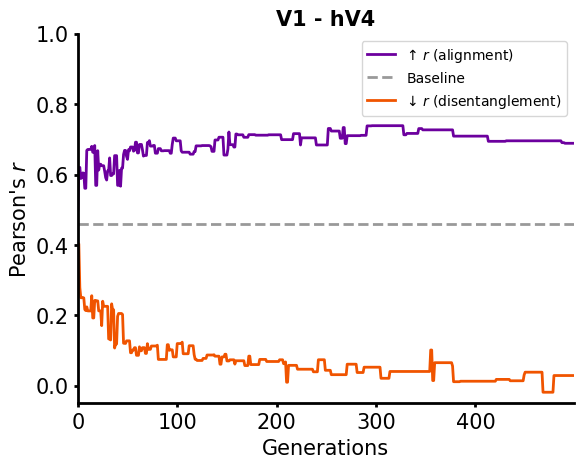

In [ ]:
# Get the evaluation subjects' RSMs RSA scores for the controlling images
align_score_eval = evaluate(best_batches_align, rsm_eval_roi_1, rsm_eval_roi_2)
disentangle_score_eval = evaluate(best_batches_disentangle, rsm_eval_roi_1,
    rsm_eval_roi_2)

# Get the evaluation subjects' RSMs RSA scores for the baseline images
baseline_imgs = np.reshape(null_dist_images[idx_baseline], (1, -1))
baseline_score_eval = evaluate(baseline_imgs, rsm_eval_roi_1, rsm_eval_roi_2)[0]

# Plot parameters
fontsize = 15
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.major.size'] = 3
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 3
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['lines.markersize'] = 3
colors = [(108/255, 0/255, 158/255), (153/255, 153/255, 153/255),
	(240/255, 84/255, 0/255)]

# Plot the results
plt.figure()
# Plot the alignment scores across generations
x = np.arange(generations)
plt.plot(x, align_score_eval, linewidth=2, color=colors[0])
# Plot the null distribution baseline scores
plt.plot([min(x), max(x)], [baseline_score_eval, baseline_score_eval], '--',
    linewidth=2, color=colors[1])
# Plot the disentanglement scores across generations
plt.plot(x, disentangle_score_eval, linewidth=2, color=colors[2])
# Title
title = roi_1 + ' - ' + roi_2
plt.title(title, fontsize=fontsize, weight='bold')
# x-axis
plt.xlabel('Generations', fontsize=fontsize)
plt.xlim(min(x), max(x))
# y-axis
plt.ylabel('Pearson\'s $r$', fontsize=fontsize)
plt.ylim(bottom=-.05, top=1)

# Legend
legend = [
    '↑ $r$ (alignment)',
    'Baseline',
    '↓ $r$ (disentanglement)'
    ]
plt.legend(legend, loc=0, ncol=1, fontsize=10, markerscale=.5);

## 2.6 | Visualize the controlling images

Finally, here you will visualize the controlling images from the last genetic optimization generation, for the two neural control conditions.

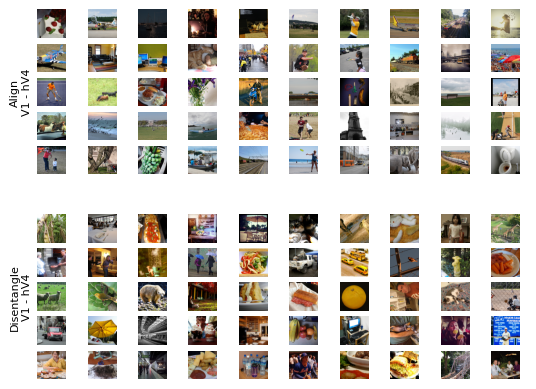

In [ ]:
# Access the image sets
if imageset == 'nsd':
    imageset_dir = os.path.join(ned_dir, 'synthetic_neural_responses',
        'imagesets', 'imageset-nsd', 'nsd_stimuli.hdf5')
    images = h5py.File(imageset_dir, 'r')
    images = images.get('imgBrick')
elif imageset == 'imagenet_val':
    imageset_dir = os.path.join(ned_dir, 'synthetic_neural_responses',
        'imagesets', 'imageset-imagenet_val')
    images = torchvision.datasets.ImageNet(root=imageset_dir, split='val')
elif imageset == 'things':
    images = metadata['things_labels']['image_paths']

# Function to load the selected image
def load_img(imageset, images, img_idx):
    if imageset == 'nsd':
        img = images[img_idx]
    elif imageset == 'imagenet_val':
        img, _ = images.__getitem__(img_idx)
        transform = trn.Compose([trn.CenterCrop(min(img.size))])
        img = transform(img)
    elif imageset == 'things':
        img_dir = os.path.join(ned_dir, 'synthetic_neural_responses',
            'imagesets', 'imageset-things', 'images', images[img_idx])
        img = Image.open(img_dir).convert('RGB')
    return img

# Plot parameters
fontsize = 8
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.bottom'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

# Create the row/column image indices
if n_images_per_batch < 10:
    columns = n_images_per_batch
else:
    columns = 10
rows_per_condition = int(np.ceil(n_images_per_batch / columns))
align_rows = np.arange(rows_per_condition)
disentangle_rows = align_rows + rows_per_condition + 1
tot_rows = 2 * rows_per_condition + 1

# Plot the images
fig, axs = plt.subplots(tot_rows, columns)
idx = 0
for r in range(rows_per_condition):
    for c in range(columns):
        # Aligning images
        img = load_img(imageset, images,
            idx_all_imgs[idx_used_imgs[best_batches_align[-1,idx]]])
        axs[align_rows[r],c].imshow(img)
        # Disentangling images
        img = load_img(imageset, images,
            idx_all_imgs[idx_used_imgs[best_batches_disentangle[-1,idx]]])
        axs[disentangle_rows[r],c].imshow(img)
        idx += 1
# Remove ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
# y-labels
axs[int(np.median(align_rows)),0].set_ylabel('Align\n'+roi_1+' - '+roi_2);
axs[int(np.median(disentangle_rows)),0].set_ylabel(
    'Disentangle\n'+roi_1+' - '+roi_2);